In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



df_1=pd.read_csv("Greenwich 2014.csv")
df_2=pd.read_csv("Greenwich 2015.csv")
df_3=pd.read_csv("Greenwich 2016.csv")
df_4=pd.read_csv("Greenwich 2017.csv")
df_5=pd.read_csv("Greenwich 2018.csv")
df_6=pd.read_csv("Greenwich 2019.csv")
df_7=pd.read_csv("Greenwich 2020.csv")
df_8=pd.read_csv("Greenwich 2021.csv")
df_9=pd.read_csv("Greenwich 2022.csv")
df_10=pd.read_csv("Greenwich 2023.csv")

#Merging all
dataframes = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10]

df = pd.concat(dataframes, axis=0, ignore_index=True)

# downloading as csv
df.to_csv('WEATHER DATA OF 10 YEARS.csv', index= False)


df.shape

(3652, 33)

In [2]:
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Greenwich,2014-01-01,-1.1,-6.8,-3.6,-1.1,-11.1,-6.3,-12.3,50.8,...,8.9,4,NaN,2014-01-01T07:19:47,2014-01-01T16:36:46,0.00,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,"KDXR,72503794745,72508654734,KHPN,KLGA,7250301..."
1,Greenwich,2014-01-02,-2.1,-9.2,-5.0,-5.7,-17.2,-10.9,-8.7,75.7,...,1.7,1,NaN,2014-01-02T07:19:52,2014-01-02T16:37:37,0.04,"Snow, Overcast",Cloudy skies throughout the day with snow.,snow,"KDXR,72503794745,72508654734,KHPN,KLGA,7250301..."
2,Greenwich,2014-01-03,-10.0,-15.0,-12.5,-15.0,-27.4,-22.0,-18.0,64.7,...,7.0,4,NaN,2014-01-03T07:19:55,2014-01-03T16:38:31,0.08,"Snow, Partially cloudy",Partly cloudy throughout the day with snow cle...,snow,"KDXR,72503794745,72508654734,KHPN,KLGA,7250301..."
3,Greenwich,2014-01-04,-4.2,-17.9,-10.3,-5.1,-23.8,-12.9,-18.3,53.7,...,9.8,5,NaN,2014-01-04T07:19:55,2014-01-04T16:39:25,0.11,Clear,Clear conditions throughout the day.,clear-day,"KDXR,72503794745,72508654734,KHPN,KLGA,7250301..."
4,Greenwich,2014-01-05,4.1,-11.8,-3.8,1.4,-16.1,-5.7,-5.5,88.2,...,1.8,1,NaN,2014-01-05T07:19:54,2014-01-05T16:40:22,0.14,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with rain or ...,rain,"KDXR,72503794745,72508654734,KHPN,KLGA,7250301..."


In [3]:
columns_to_drop=["name","tempmax","tempmin","feelslikemax","feelslike","feelslikemin","severerisk","sunrise","sunset","moonphase","conditions","description","icon","stations"]
df.drop(columns=columns_to_drop, inplace=True)


In [4]:
df.head()

,datetime,temp,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex
0,2014-01-01,-3.6,-12.3,50.8,0.000,0,0.00,NaN,0.0,0.0,44.3,18.2,292.5,1026.9,41.7,16.0,102.7,8.9,4
1,2014-01-02,-5.0,-8.7,75.7,0.923,100,29.17,snow,2.9,1.0,50.0,24.0,44.9,1015.5,100.0,10.8,21.0,1.7,1
2,2014-01-03,-12.5,-18.0,64.7,0.832,100,29.17,snow,1.7,3.8,61.3,45.5,336.5,1016.8,55.0,9.0,78.6,7.0,4
3,2014-01-04,-10.3,-18.3,53.7,0.000,0,0.00,NaN,0.0,3.0,33.4,14.8,252.5,1029.8,6.1,16.0,113.5,9.8,5
4,2014-01-05,-3.8,-5.5,88.2,0.996,100,33.33,"rain,snow",0.0,2.1,NaN,11.1,81.0,1022.2,65.5,6.6,20.3,1.8,1


In [5]:
df_NO2 = pd.read_csv("Greenwich_NO2_Levels")
df_NO2.isna().sum()



Date                3
Nitrogen dioxide    4
Status              4
dtype: int64

In [6]:
df_NO2= df_NO2.iloc[:-5]

In [7]:
df_NO2.isna().sum()

Date                0
Nitrogen dioxide    0
Status              0
dtype: int64

In [8]:

# Normalize date format in both DataFrames
def normalize_date_format(date_str):
    try:
        # Attempt to parse date in the format year-day-month
        return pd.to_datetime(date_str, format='%Y-%d-%m', errors='raise')
    except ValueError:
        try:
            # Attempt to parse date in the format day/month/year
            return pd.to_datetime(date_str, format='%d/%m/%Y', errors='raise')
        except ValueError:
            # Handle other possible formats or raise an error
            return pd.to_datetime(date_str, errors='coerce')  # 'coerce' turns invalid parsing into NaT

df_NO2['Date'] = df_NO2['Date'].apply(normalize_date_format)
df['datetime'] = df['datetime'].apply(normalize_date_format)

# Convert the datetime objects to the desired format
df_NO2['Date'] = df_NO2['Date'].dt.strftime('%Y-%m-%d')
df['datetime'] = df['datetime'].dt.strftime('%Y-%m-%d')



In [9]:
df.shape

(3652, 19)

In [10]:
df.columns

Index(['datetime', 'temp', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex'],
      dtype='object')

In [11]:
df_NO2.shape

(3652, 3)

In [12]:
# concatinating column wise using axis=1
df_new = pd.concat([df_NO2, df], axis=1)


# here we are aligning column wise so dont put ignore index= True as it will not preserve column names . that is it ignores 
#original index of column , ie column names and put 1 2 3 as col names.

In [13]:
df_new.columns

Index(['Date', 'Nitrogen dioxide', 'Status', 'datetime', 'temp', 'dew',
       'humidity', 'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex'],
      dtype='object')

In [14]:
df_new.shape

(3652, 22)

In [15]:
df_new.isna().sum()

Date                   0
Nitrogen dioxide       0
Status                 0
datetime               0
temp                   0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          2001
snow                   0
snowdepth              0
windgust             129
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
dtype: int64

In [16]:
df_new.dtypes

Date                 object
Nitrogen dioxide     object
Status               object
datetime             object
temp                float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
dtype: object

In [17]:
column_to_drop=["Status","preciptype","windgust"]
df_new.drop(columns=column_to_drop, inplace= True)


In [18]:
df_new.head()

,Date,Nitrogen dioxide,datetime,temp,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex
0,2014-01-01,4,2014-01-01,-3.6,-12.3,50.8,0.000,0,0.00,0.0,0.0,18.2,292.5,1026.9,41.7,16.0,102.7,8.9,4
1,2014-01-02,12,2014-02-01,-5.0,-8.7,75.7,0.923,100,29.17,2.9,1.0,24.0,44.9,1015.5,100.0,10.8,21.0,1.7,1
2,2014-01-03,8,2014-03-01,-12.5,-18.0,64.7,0.832,100,29.17,1.7,3.8,45.5,336.5,1016.8,55.0,9.0,78.6,7.0,4
3,2014-01-04,17,2014-04-01,-10.3,-18.3,53.7,0.000,0,0.00,0.0,3.0,14.8,252.5,1029.8,6.1,16.0,113.5,9.8,5
4,2014-01-05,13,2014-05-01,-3.8,-5.5,88.2,0.996,100,33.33,0.0,2.1,11.1,81.0,1022.2,65.5,6.6,20.3,1.8,1


In [19]:
df_new = df_new[df_new['Nitrogen dioxide'] != 'No data']

In [20]:
df_new['Nitrogen dioxide'] = pd.to_numeric(df_new['Nitrogen dioxide'])


In [21]:
df_new.head()
df_new2=df_new.copy()

In [22]:
df_new.shape

(3076, 19)

In [23]:
# CONVERT THE DF INTO MEAN MONTHLY DATA

df_new['Date'] = pd.to_datetime(df_new['Date'])

df_new['YearMonth'] = df_new['Date'].dt.to_period('M')
df_new.drop(columns = ["datetime", "Date"], inplace=True)

# Calculate mean for each month
monthly_mean_df = df_new.groupby('YearMonth').mean().reset_index()


# Convert 'YearMonth' to datetime format for plotting
monthly_mean_df['YearMonth'] = monthly_mean_df['YearMonth'].dt.to_timestamp()
monthly_mean_df.set_index('YearMonth', inplace=True)
df=monthly_mean_df.copy()

In [24]:
df.columns

Index(['Nitrogen dioxide', 'temp', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'snow', 'snowdepth', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex'],
      dtype='object')

In [25]:
df.shape

(106, 17)

In [26]:

# Created separate df for each column to try univariate approach while VAR modelling

# Dictionary to hold separate DataFrames for each column
dfs = {}

# Loop through each column in the DataFrame
for col in df.columns:
    # Create a new DataFrame with a single column
    dfs[col] = df[[col]] ## double brackets gives output as df instead of series

# Now you can access each DataFrame using the column name
# For example, to access the DataFrame for column 'Nitrogen dioxide'
dfs['Nitrogen dioxide'].head(5)



,Nitrogen dioxide
YearMonth,
2014-01-01,23.903226
2014-02-01,16.892857
2014-03-01,29.580645
2014-04-01,23.033333
2014-05-01,17.451613


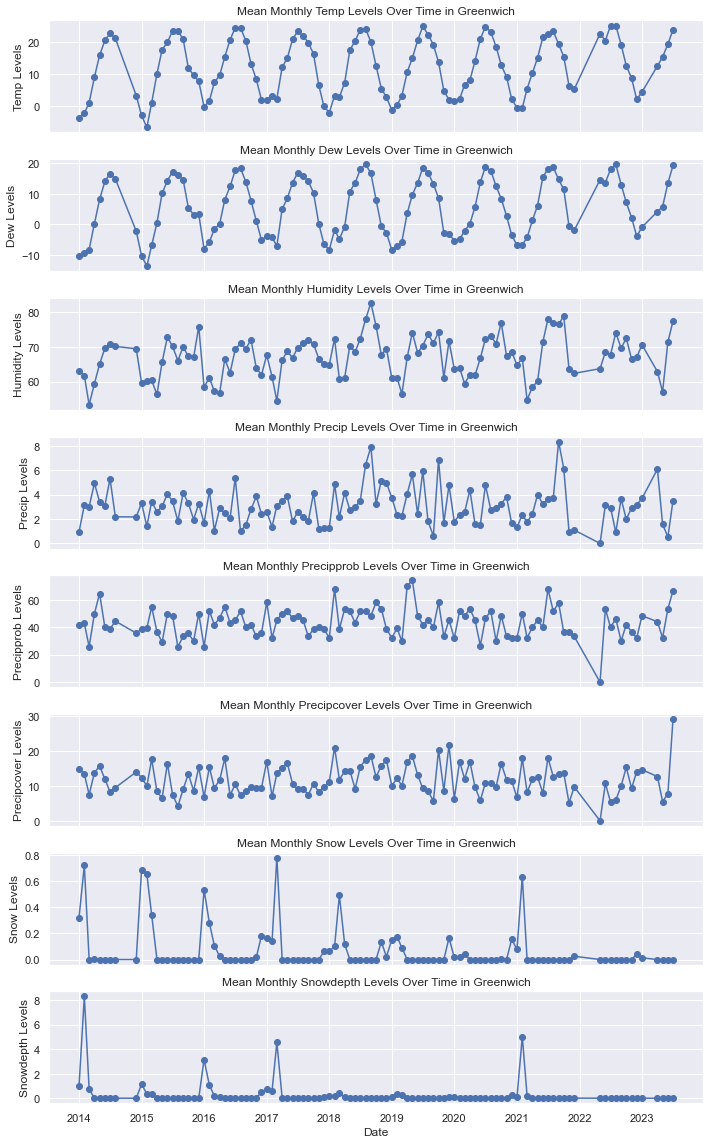

In [27]:
# Plotting TS for each column

df_englegranger=df.copy()
columns_to_plot = [col for col in df.columns if col != "Nitrogen dioxide"]
num_columns = len(columns_to_plot)
mid_point = num_columns // 2

# First Half of the Columns
fig, axes = plt.subplots(nrows=mid_point, ncols=1, figsize=(10, 2 * mid_point), sharex=True)

for i, col in enumerate(columns_to_plot[:mid_point]):
    axes[i].plot(df.index, df[col], marker='o')
    axes[i].set_title(f'Mean Monthly {col.capitalize()} Levels Over Time in Greenwich')
    axes[i].set_ylabel(f'{col.capitalize()} Levels')
    axes[i].grid(True)

axes[-1].set_xlabel('Date')
plt.tight_layout()
plt.savefig('plot_part1.png', bbox_inches='tight')
plt.show()


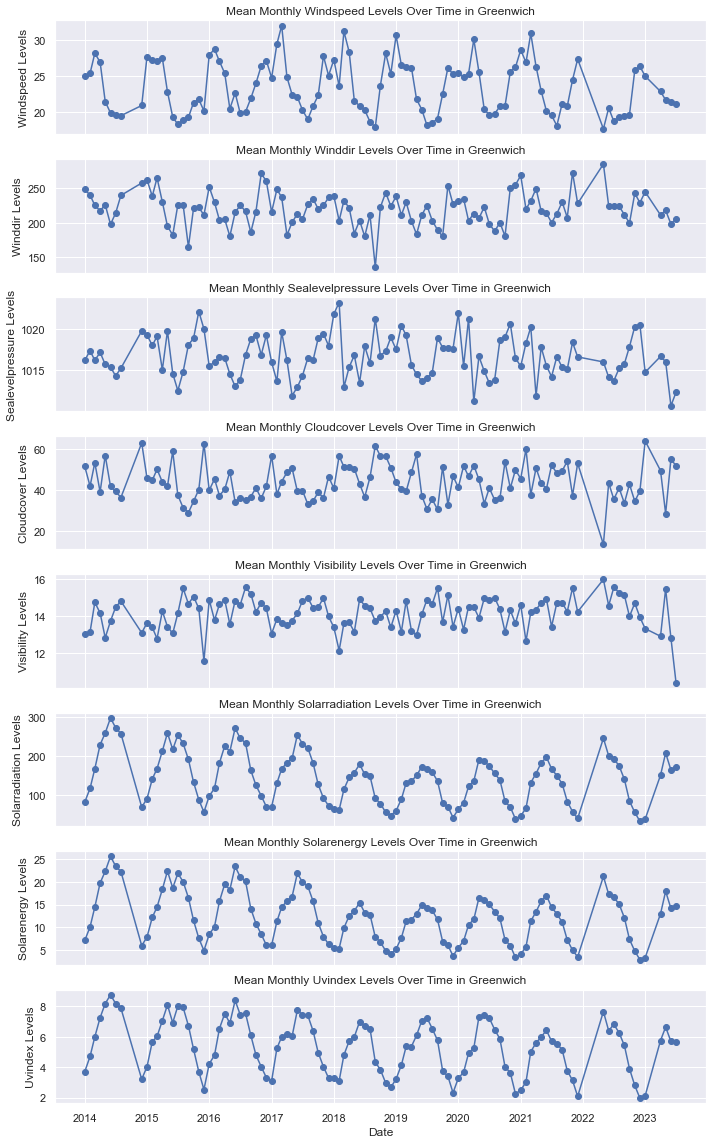

In [28]:
# Second Half of the Columns
fig, axes = plt.subplots(nrows=(num_columns - mid_point), ncols=1, figsize=(10, 2 * (num_columns - mid_point)), sharex=True)

for i, col in enumerate(columns_to_plot[mid_point:]):
    axes[i].plot(df.index, df[col], marker='o')
    axes[i].set_title(f'Mean Monthly {col.capitalize()} Levels Over Time in Greenwich')
    axes[i].set_ylabel(f'{col.capitalize()} Levels')
    axes[i].grid(True)

axes[-1].set_xlabel('Date')
plt.tight_layout()
plt.savefig('plot_part2.png', bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

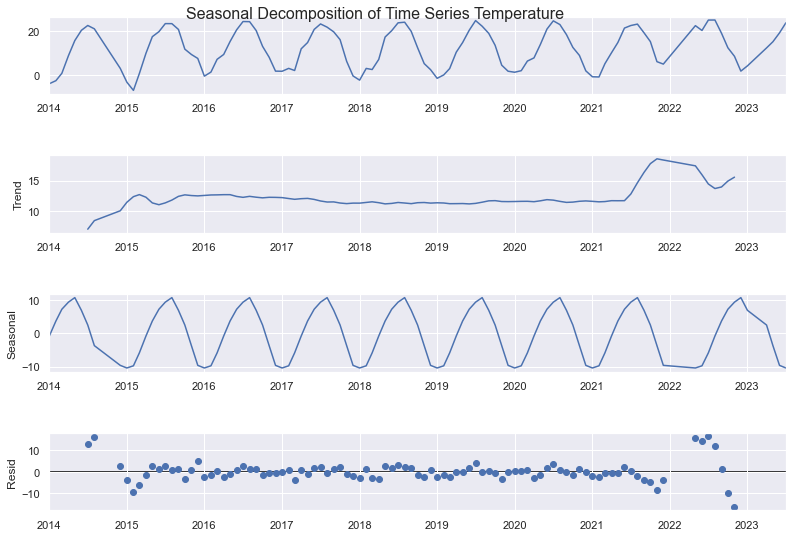

In [29]:
# showing seasonal decomposition of 1 TS, We cant show decomposition for all , so we can find stationarity using ad fuller test


df_temp  = dfs['temp']
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_temp, model='additive', period=12)  
fig=plt.figure()
# Add titles to each subplot
titles = ['Observed', 'Trend', 'Seasonal', 'Residual']
for ax, title in zip(fig.axes, titles):
    ax.set_title(title, fontsize=14)

fig=decomposition.plot()
fig.suptitle('Seasonal Decomposition of Time Series Temperature', fontsize=16)  # Title for the entire figure


fig.set_size_inches(12,8)
    

In [30]:
df_temp.head()

,temp
YearMonth,
2014-01-01,-3.725806
2014-02-01,-2.357143
2014-03-01,0.967742
2014-04-01,8.923333
2014-05-01,15.761290


In [31]:
# CHECK FOR STATIONARITY USING AD FULLER TEST FOR EACH TS( ie for each variable)


from statsmodels.tsa.stattools import adfuller 

def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series) #Hypothesis testing
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic',
              'p-value',
              '#Lags Used',
              'Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] < 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

for key, value in dfs.items():
    temporary_df= dfs[key]
    print(key)
    result = adf_check(temporary_df)
    print("\n")

Nitrogen dioxide
Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.08512330955831011
p-value : 0.9509002970243141
#Lags Used : 13
Number of Observations Used : 92
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


temp
Augmented Dickey-Fuller Test:
ADF Test Statistic : -9.322791900503626
p-value : 9.789865839010548e-16
#Lags Used : 3
Number of Observations Used : 102
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


dew
Augmented Dickey-Fuller Test:
ADF Test Statistic : -9.737675392333005
p-value : 8.662334148862683e-17
#Lags Used : 3
Number of Observations Used : 102
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


humidity
Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.9035431654883486
p-value : 0.3303961341278
#Lags Used : 13
Number of Observations Used : 92
weak evidence against null hypothes

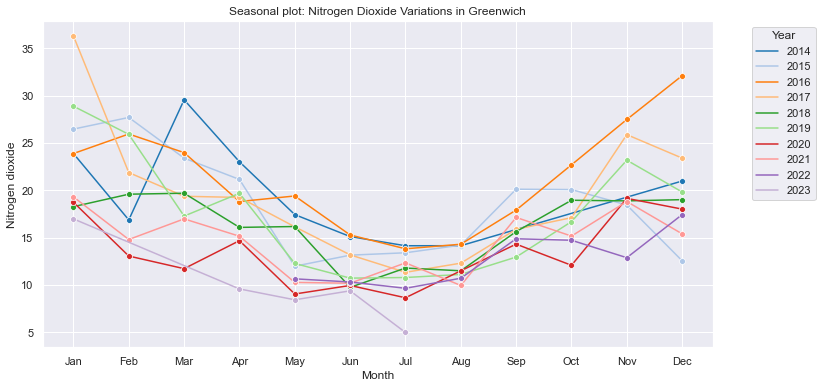

In [32]:
# Plot seasonal data using seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Create a figure with two subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create the line plot
sns.lineplot(data=df, x=df.index.month, y='Nitrogen dioxide', hue=df.index.year, marker='o', palette='tab20', ax=ax1)

# Customize the x-axis to show month names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(months)

# Set labels and title
ax1.set_xlabel('Month')
ax1.set_ylabel('Nitrogen dioxide')
ax1.set_title('Seasonal plot: Nitrogen Dioxide Variations in Greenwich')
ax1.grid(True)
ax1.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()



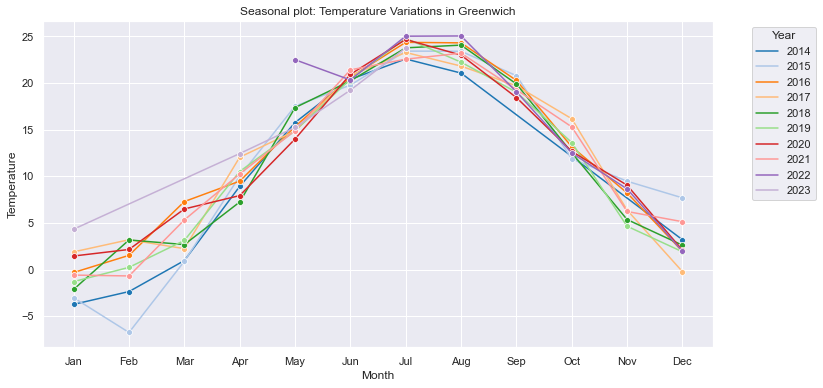

In [33]:
# Plot seasonal data using seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Create a figure with two subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create the line plot
sns.lineplot(data=df, x=df.index.month, y='temp', hue=df.index.year, marker='o', palette='tab20', ax=ax1)

# Customize the x-axis to show month names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(months)

# Set labels and title
ax1.set_xlabel('Month')
ax1.set_ylabel('Temperature')
ax1.set_title('Seasonal plot: Temperature Variations in Greenwich')
ax1.grid(True)
ax1.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()

In [34]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assume df is your DataFrame with a DateTimeIndex
df.index = pd.to_datetime(df.index)

# Extract temperature data (assuming 'Temperature' is the column name)
temperature_data = df['temp']

# Perform the Augmented Dickey-Fuller test
result = adfuller(temperature_data.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')


ADF Statistic: -9.322791900503626
p-value: 9.789865839010548e-16
Critical Values:
   1%, -3.4961490537199116
Critical Values:
   5%, -2.8903209639580556
Critical Values:
   10%, -2.5821223452518263


The ADF TEST PROVED THAT TEMPERATURE IS STATIONARY. A TS WITH SEASONAL COMPONENT CANE BE STATIONARY IF THE SEASONAL COMPONENET IS CONSISTENT OVER THE TIME AND DO NOT CHANGE. CLEARLY, THERES NO TREND FOR TEMPERATURE.

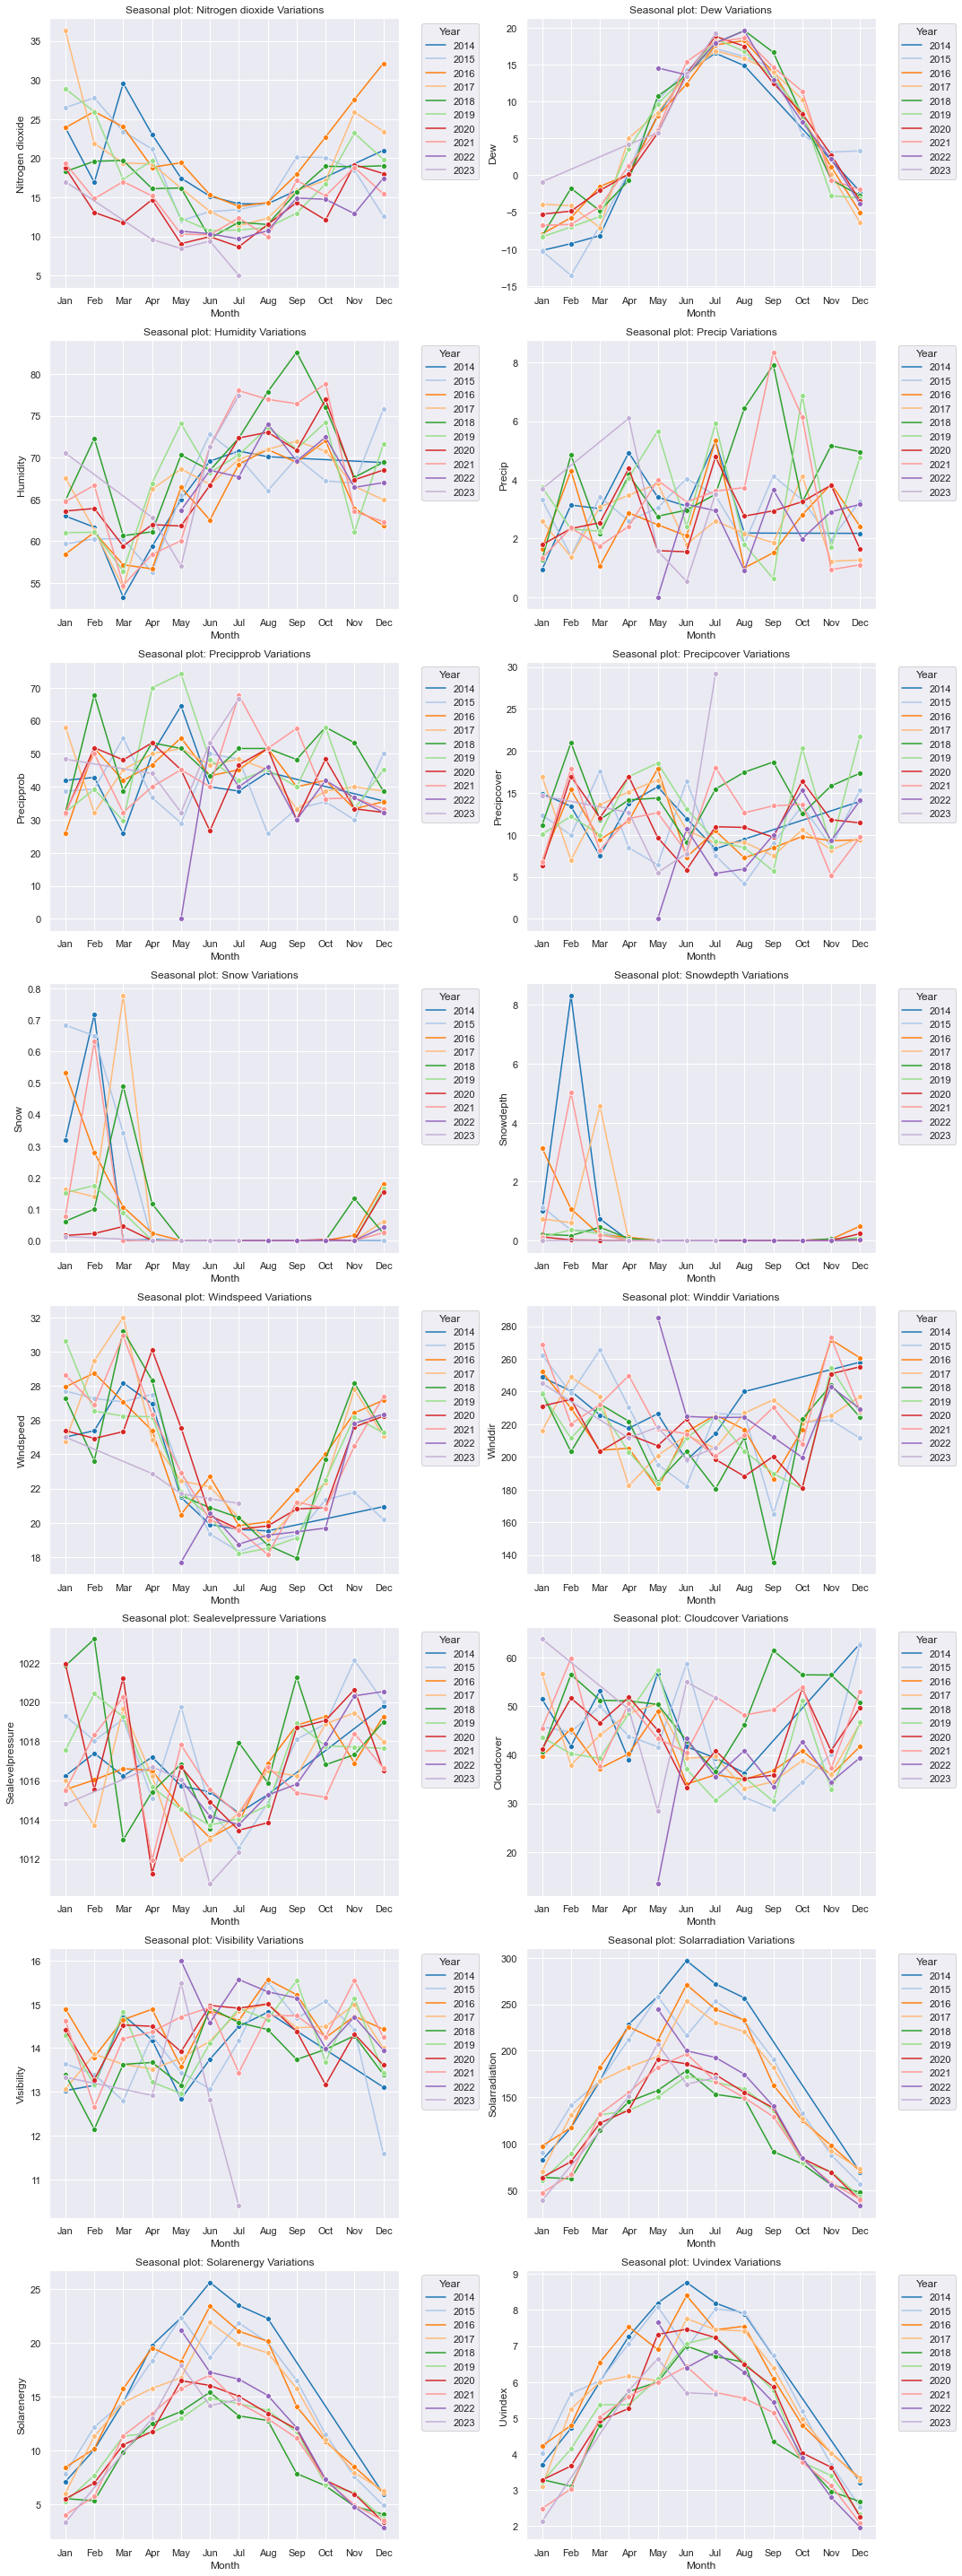

In [35]:
# Plotting seasonal plot for each column

exclude_columns = ['no2', 'temp']

# Filter the DataFrame to include only the desired columns
columns_to_plot = [col for col in df.columns if col not in exclude_columns]

# Determine the number of rows needed for the subplots
num_columns = 2
num_plots = len(columns_to_plot)
num_rows = (num_plots + num_columns - 1) // num_columns

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()


# Loop through the columns and create line plots
for i, col in enumerate(columns_to_plot):
    sns.lineplot(data=df, x=df.index.month, y=col, hue=df.index.year, marker='o', palette='tab20', ax=axes[i])
    axes[i].set_xticks(range(1, 13))
    axes[i].set_xticklabels(months)
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel(col.capitalize())
    axes[i].set_title(f'Seasonal plot: {col.capitalize()} Variations')
    axes[i].grid(True)
    axes[i].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.savefig('Seasonalplot.png')
plt.show()


In [36]:

import numpy as np


# List of columns to exclude
exclude_columns = ['no2', 'temp']

# Filter the DataFrame to include only the desired columns
columns_to_plot = [col for col in df.columns if col not in exclude_columns]

# Determine the midpoint to split the columns
midpoint = len(columns_to_plot) // 2

# Define the function to plot and save the seasonal plots
def plot_and_save(columns, filename):
    num_columns = 2
    num_plots = len(columns)
    num_rows = (num_plots + num_columns - 1) // num_columns

    # Create subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, num_rows * 5))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Loop through the columns and create line plots
    for i, col in enumerate(columns):
        sns.lineplot(data=df, x=df.index.month, y=col, hue=df.index.year, marker='o', palette='tab20', ax=axes[i])
        axes[i].set_xticks(range(1, 13))
        axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        axes[i].set_xlabel('Month')
        axes[i].set_ylabel(col.capitalize())
        axes[i].set_title(f'Seasonal plot: {col.capitalize()} Variations')
        axes[i].grid(True)
        axes[i].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Save the plot
    plt.savefig(filename, bbox_inches='tight')
    plt.close()

# Plot and save the first half columns
plot_and_save(columns_to_plot[:midpoint], 'Seasonalplot_part1.png')

# Plot and save the second half columns
plot_and_save(columns_to_plot[midpoint:], 'Seasonalplot_part2.png')


In [37]:
df.tail()

,Nitrogen dioxide,temp,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex
YearMonth,,,,,,,,,,,,,,,,,
2023-01-01,17.000000,4.332258,-0.883871,70.551613,3.691935,48.387097,14.650645,0.012903,0.0,25.006452,245.064516,1014.793548,63.880645,13.335484,38.877419,3.335484,2.129032
2023-04-01,9.600000,12.440000,4.192000,62.844000,6.096480,44.000000,12.666800,0.000000,0.0,22.880000,211.500000,1016.696000,49.420000,12.920000,150.724000,12.964000,5.760000
2023-05-01,8.451613,15.241935,5.741935,57.019355,1.578484,32.258065,5.510323,0.000000,0.0,21.703226,218.219355,1016.067742,28.467742,15.483871,207.503226,17.912903,6.645161
2023-06-01,9.400000,19.236667,13.443333,71.343333,0.538333,53.333333,7.778667,0.000000,0.0,21.406667,198.423333,1010.730000,55.013333,12.830000,164.030000,14.153333,5.700000
2023-07-01,5.000000,23.766667,19.200000,77.433333,3.519333,66.666667,29.166667,0.000000,0.0,21.133333,205.700000,1012.366667,51.766667,10.400000,171.033333,14.733333,5.666667


 Differencing

To find out whether normal differencing or seasonal differencing or both is required, we should decompose non stationary ts which are:
Nitrogen dioxide, humidity,solarradiation, solarenrgy, uvindex

<Figure size 432x288 with 0 Axes>

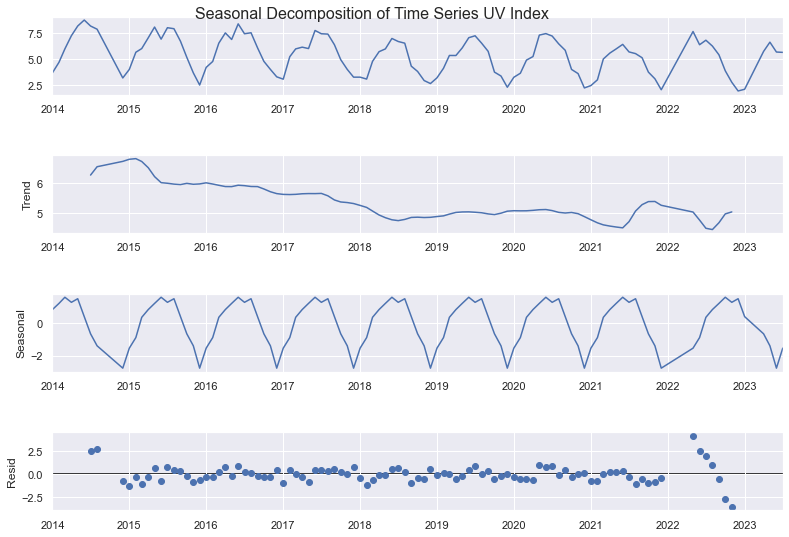

In [38]:
df_temp  = dfs['uvindex']
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_temp, model='additive', period=12)  
fig=plt.figure()
# Add titles to each subplot
titles = ['Observed', 'Trend', 'Seasonal', 'Residual']
for ax, title in zip(fig.axes, titles):
    ax.set_title(title, fontsize=14)

fig=decomposition.plot()
fig.suptitle('Seasonal Decomposition of Time Series UV Index', fontsize=16)  
plt.savefig('Seasonal Decomposition of Time Series uvindex.png')

fig.set_size_inches(12,8)
    

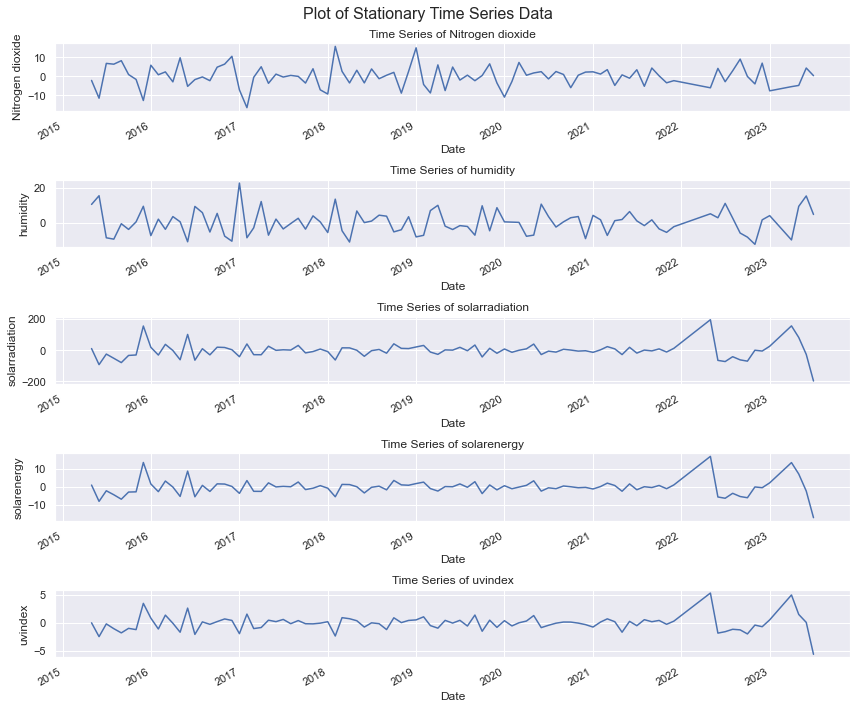

In [39]:
# Differencing : 

#From the seasonal decomposition plots and trend line and adf test, we can see that these Nitrogen dioxide, humidity,solarradiation, solarenrgy, uvindex
#are non stationary and need both differencing

#SEASONAL DIFFERENCING ; dt = yt - yt-12 and #NORMAL DIFFERENCING ; kt= dt - dt-1

df['Nitrogen dioxide'] = df['Nitrogen dioxide'].diff().diff(12)
df['humidity']= df['humidity'].diff().diff(12)
df['solarradiation'] = df['solarradiation'].diff().diff(12)
df['solarenergy'] = df['solarenergy'].diff().diff(12)
df['uvindex'] = df['uvindex'].diff().diff(12)




#DROPPING NAN VALUES

df = df.dropna()

columns_to_plot=["Nitrogen dioxide", "humidity","solarradiation","solarenergy","uvindex"]

num_plots = len(columns_to_plot)

# Create subplots
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(12, 10))

# Flatten the axes array for easy iteration if there's only one column, axes will not be an array
if num_plots == 1:
    axes = [axes]

# Plot each time series in a separate subplot
for i, col in enumerate(columns_to_plot):
    df[col].plot(ax=axes[i])
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('Date')
    axes[i].set_title(f'Time Series of {col}')
    
fig.suptitle('Plot of Stationary Time Series Data', fontsize=16)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.savefig('Plot of Stationary Time series Data.png')

plt.show()

In [40]:
#ADF checking

check_columns=["Nitrogen dioxide", "humidity","solarradiation","solarenergy","uvindex"]


for i in check_columns:
    temporary_df= df[i]
    print(i)
    result = adf_check(temporary_df)
    print("\n")

Nitrogen dioxide
Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.1237194947443605
p-value : 0.0008846896452804067
#Lags Used : 12
Number of Observations Used : 80
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


humidity
Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.830458430841666
p-value : 0.0026106151421504387
#Lags Used : 11
Number of Observations Used : 81
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


solarradiation
Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.459160325155624
p-value : 0.00023289379572759476
#Lags Used : 11
Number of Observations Used : 81
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


solarenergy
Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.4454907937024055
p-value : 0.00024638644940578697
#Lags Used : 11
Number of Observations Used

In [41]:
# Created separate df for each column to try univariate approach while VAR modelling

dfs = {}

for col in df.columns:
    
    dfs[col] = df[[col]] 


In [42]:
df_qwerty=df.copy()

In [43]:
df_2 = df.copy()

### ALL COLUMNS ARE NOW STATIONARY WITH 1ST ORDER OF DIFFFERENCING

 NOW CHECK FOR MULTI COLLINEARITY BETWEEN THE  VARIABLES USING VIF METHOD - IF EXISTS:
#1)EITHER SPLIT THE DF INTO MANY DFS , THAT IS ONE DF FOR EACH TS, THAT IS MAKING IT UNIVARIATE APPROACH
#2) OR DROP COLUMNS WITH HIGH VIF OR USE PCA - MULTIVARIATE APPROACH

#COMPARE BOTH APPROACH RESULT

In [44]:

df.drop(columns=["Nitrogen dioxide"], inplace = True)
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Define the number of lags you want
n_lags = 3  # For example, create lagged features up to 3 lags

# Create a DataFrame to store lagged features
lagged_df = pd.DataFrame(index=df.index)

for col in df.columns:
    for lag in range(1, n_lags + 1):
        lagged_df[f'{col}_lag{lag}'] = df[col].shift(lag)

# Combine original DataFrame with lagged features
combined_df = pd.concat([df, lagged_df], axis=1)

# Drop rows with NaN values that might have been created by the lagging process
cleaned_combined_df = combined_df.dropna()

# Define a function to calculate VIF
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

# Calculate VIF
vif_df = calculate_vif(cleaned_combined_df)
print(vif_df)


            Variable           VIF
0               temp   2549.291526
1                dew   1266.124239
2           humidity      6.936019
3             precip     20.708635
4         precipprob    226.525445
..               ...           ...
59  solarenergy_lag2  82200.511844
60  solarenergy_lag3  56596.383402
61      uvindex_lag1     53.079804
62      uvindex_lag2     91.313949
63      uvindex_lag3     60.481288

[64 rows x 2 columns]


In [45]:
df_vif_check=df.copy()

columns_to_drop=["dew","snowdepth","precipprob","precipcover","visibility","solarenergy","uvindex","winddir","cloudcover","sealevelpressure"]

df_vif_check.drop(columns=columns_to_drop, inplace=True)

In [46]:

# WITHOUT CONSIDERING LAGS, THESE ELEMENTS CAN EXIST WITHOUT MULTICOLLINEARITY
vif_df = calculate_vif(df_vif_check)
print(vif_df)

         Variable       VIF
0            temp  3.498931
1        humidity  1.092269
2          precip  4.697810
3            snow  1.649613
4       windspeed  5.954375
5  solarradiation  1.095224


In [47]:
pd.set_option('display.max_rows', None)
vif_df

,Variable,VIF
0,temp,3.498931
1,humidity,1.092269
2,precip,4.697810
3,snow,1.649613
4,windspeed,5.954375
5,solarradiation,1.095224


Given the columns you mentioned (temp, humidity, dew, solar energy, UV index, etc.), 
it's not surprising to see high VIF values. Weather variables are often highly correlated, 
especially when measured over a long period like 10 years.


In [48]:
df.corr()

,temp,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex
temp,1.000000,0.989409,0.145345,0.152845,0.161076,-0.157193,-0.515561,-0.362326,-0.859740,-0.446966,-0.441461,-0.317047,0.301587,-0.151112,-0.150936,-0.114427
dew,0.989409,1.000000,0.170232,0.204931,0.206620,-0.088834,-0.525066,-0.372905,-0.888696,-0.470749,-0.412036,-0.244679,0.243130,-0.179999,-0.179916,-0.148097
humidity,0.145345,0.170232,1.000000,0.113256,0.242270,0.220428,-0.120638,-0.063091,-0.246982,-0.256018,-0.003837,0.235885,-0.248280,-0.235986,-0.235754,-0.330541
precip,0.152845,0.204931,0.113256,1.000000,0.442189,0.581748,-0.087047,-0.085932,-0.163632,-0.333715,-0.018939,0.408791,-0.256280,-0.140516,-0.140746,-0.170826
precipprob,0.161076,0.206620,0.242270,0.442189,1.000000,0.708441,-0.051594,-0.022121,-0.114227,-0.492432,-0.253860,0.624023,-0.519603,-0.330440,-0.331050,-0.342820
precipcover,-0.157193,-0.088834,0.220428,0.581748,0.708441,1.000000,0.108232,0.085949,0.073720,-0.398195,0.004007,0.707271,-0.744638,-0.364196,-0.364317,-0.415531
snow,-0.515561,-0.525066,-0.120638,-0.087047,-0.051594,0.108232,1.000000,0.897561,0.552754,0.249745,0.097811,0.175743,-0.197287,0.008448,0.007999,0.014801
snowdepth,-0.362326,-0.372905,-0.063091,-0.085932,-0.022121,0.085949,0.897561,1.000000,0.377995,0.162854,0.108467,0.134510,-0.162343,-0.008426,-0.009236,-0.005872
windspeed,-0.859740,-0.888696,-0.246982,-0.163632,-0.114227,0.073720,0.552754,0.377995,1.000000,0.457674,0.218043,0.219985,-0.191581,0.126498,0.126950,0.122129
winddir,-0.446966,-0.470749,-0.256018,-0.333715,-0.492432,-0.398195,0.249745,0.162854,0.457674,1.000000,0.012917,-0.256890,0.256635,0.279103,0.279360,0.263740


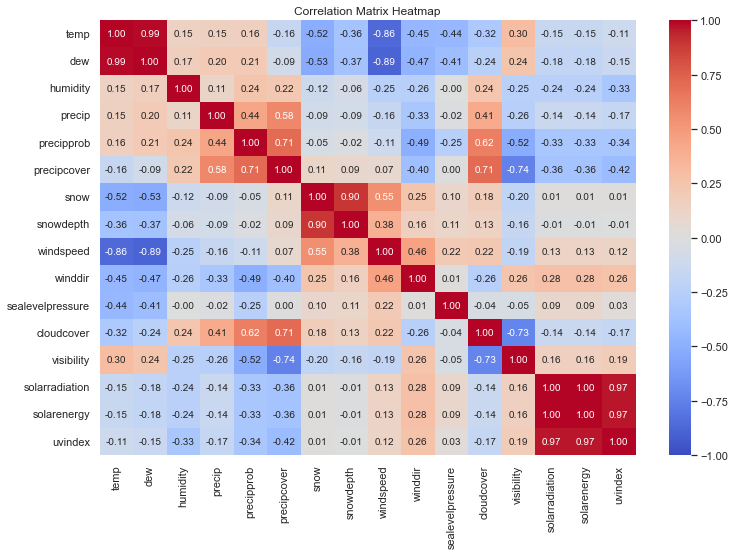

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))  

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# Customize the plot
plt.title('Correlation Matrix Heatmap')
plt.savefig('Heatmap.png')

plt.show()


In [50]:
# dropping columns with high multi collineariaty based on correlation df
df_test1=df.copy()
df_test2=df.copy()
columns_to_drop=["dew", "windspeed","snowdepth","precipprob","precipcover","visibility","solarenergy","uvindex","sealevelpressure","winddir","cloudcover","snow"]
df.drop(columns=columns_to_drop, inplace = True)
df_2.drop(columns=columns_to_drop, inplace = True)

In [51]:
df.head()

,temp,humidity,precip,solarradiation
YearMonth,,,,
2015-05-01,17.522581,10.592158,3.043097,11.290545
2015-06-01,19.776667,15.651068,4.043000,-92.342158
2015-07-01,23.422581,-8.842903,3.466355,-24.283226
2015-08-01,23.406452,-9.635699,1.828613,-51.513441
2015-09-01,20.786667,-0.658280,4.135800,-79.159462


In [52]:
df.corr()

,temp,humidity,precip,solarradiation
temp,1.000000,0.145345,0.152845,-0.151112
humidity,0.145345,1.000000,0.113256,-0.235986
precip,0.152845,0.113256,1.000000,-0.140516
solarradiation,-0.151112,-0.235986,-0.140516,1.000000


In [53]:
#  VIF

n_lags = 3  # For example, create lagged features up to 3 lags

# Create a DataFrame to store lagged features
lagged_df = pd.DataFrame(index=df.index)

for col in df.columns:
    for lag in range(1, n_lags + 1):
        lagged_df[f'{col}_lag{lag}'] = df[col].shift(lag)

# Combine original DataFrame with lagged features
combined_df = pd.concat([df, lagged_df], axis=1)

# Drop rows with NaN values that might have been created by the lagging process
cleaned_combined_df = combined_df.dropna()

# Define a function to calculate VIF
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

# Calculate VIF
vif_df = calculate_vif(cleaned_combined_df)
print(vif_df)


               Variable        VIF
0                  temp  26.118863
1              humidity   1.708965
2                precip   4.805024
3        solarradiation   1.637854
4             temp_lag1  65.135567
5             temp_lag2  67.124550
6             temp_lag3  28.843132
7         humidity_lag1   1.901940
8         humidity_lag2   1.660151
9         humidity_lag3   1.314410
10          precip_lag1   4.743944
11          precip_lag2   4.884122
12          precip_lag3   5.353173
13  solarradiation_lag1   1.578900
14  solarradiation_lag2   1.724112
15  solarradiation_lag3   1.654935


In [54]:
df.corr()

,temp,humidity,precip,solarradiation
temp,1.000000,0.145345,0.152845,-0.151112
humidity,0.145345,1.000000,0.113256,-0.235986
precip,0.152845,0.113256,1.000000,-0.140516
solarradiation,-0.151112,-0.235986,-0.140516,1.000000


In [55]:
# As we can see temp has strong AUTOCORRELATION , that is temp values are highly correlated with their previous lags. 
#This is expected as temperature tends to be persistent over time. This can lead to unsatable variances in the model.
# So dropping higher lags of temp

cleaned_combined_df.drop(columns=["temp_lag1","temp_lag2"], inplace=True)

In [56]:
vif_df = calculate_vif(cleaned_combined_df)
print(vif_df)

# Now multicollinearity is very low and now we can forward to modelling

               Variable       VIF
0                  temp  3.189784
1              humidity  1.636507
2                precip  4.506205
3        solarradiation  1.239538
4             temp_lag3  3.970068
5         humidity_lag1  1.747460
6         humidity_lag2  1.474674
7         humidity_lag3  1.300339
8           precip_lag1  4.615292
9           precip_lag2  4.766919
10          precip_lag3  4.488351
11  solarradiation_lag1  1.209772
12  solarradiation_lag2  1.445887
13  solarradiation_lag3  1.415509


In [57]:

# Repeating this step for df_2 also , which has no2 data too.

n_lags = 3  # For example, create lagged features up to 3 lags

# Create a DataFrame to store lagged features
lagged_df_no2 = pd.DataFrame(index=df.index)

for col in df_2.columns:
    for lag in range(1, n_lags + 1):
        lagged_df_no2[f'{col}_lag{lag}'] = df_2[col].shift(lag)

# Combine original DataFrame with lagged features
combined_df = pd.concat([df_2, lagged_df_no2], axis=1)

# Drop rows with NaN values that might have been created by the lagging process
cleaned_no2_df = combined_df.dropna()

# Define a function to calculate VIF
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

cleaned_no2_df.drop(columns=["temp_lag1","temp_lag2"], inplace=True)
# Calculate VIF
vif_df = calculate_vif(cleaned_no2_df)
print(vif_df)

                 Variable       VIF
0        Nitrogen dioxide  1.710705
1                    temp  3.224099
2                humidity  1.962048
3                  precip  4.667442
4          solarradiation  1.572289
5   Nitrogen dioxide_lag1  1.875285
6   Nitrogen dioxide_lag2  1.763763
7   Nitrogen dioxide_lag3  1.610888
8               temp_lag3  3.987509
9           humidity_lag1  2.254711
10          humidity_lag2  1.870978
11          humidity_lag3  1.522316
12            precip_lag1  4.953296
13            precip_lag2  5.204900
14            precip_lag3  5.060287
15    solarradiation_lag1  1.498751
16    solarradiation_lag2  1.623236
17    solarradiation_lag3  1.593844


In [58]:
# USE GRANGER TEST ON STATIONARY DF AND FIND RESULT.

# Checking Impact of weather on NO2 levels 
import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests


weather_df = cleaned_no2_df.copy()
columns_to_keep = ["Nitrogen dioxide", "temp", "humidity","precip","solarradiation"]

# Create a new DataFrame with only the specified columns
weather_df = weather_df[columns_to_keep]

# Fit a VAR model and select the optimal lag length using AIC
model = VAR(weather_df)
results = model.select_order(maxlags=3)
selected_lag = results.aic

print(f"Optimal number of lags according to AIC: {selected_lag}")

# Define NO2 levels as the dependent variable
dependent_var = 'Nitrogen dioxide'

# Define the independent variables (weather variables)
independent_vars = [col for col in weather_df.columns if col != dependent_var]

# Results dictionary to store p-values
granger_results = {}

# Loop through each independent variable
for var in independent_vars:
    print(f"\nTesting Granger Causality for {var} -> {dependent_var}")
    test_result = grangercausalitytests(weather_df[[var, dependent_var]], maxlag=selected_lag, verbose=True)
    
    # Collect p-values for each lag
    p_values = [round(test_result[i+1][0]['ssr_ftest'][1], 4) for i in range(selected_lag)]
    granger_results[var] = p_values

# Display results
print("\nGranger Causality Test Results (p-values for lags up to the selected lag):")
for var, p_vals in granger_results.items():
    print(f"{var} -> {dependent_var}: {p_vals}")


Optimal number of lags according to AIC: 3

Testing Granger Causality for temp -> Nitrogen dioxide

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3411  , p=0.5607  , df_denom=86, df_num=1
ssr based chi2 test:   chi2=0.3530  , p=0.5524  , df=1
likelihood ratio test: chi2=0.3523  , p=0.5528  , df=1
parameter F test:         F=0.3411  , p=0.5607  , df_denom=86, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0420  , p=0.9589  , df_denom=83, df_num=2
ssr based chi2 test:   chi2=0.0890  , p=0.9565  , df=2
likelihood ratio test: chi2=0.0890  , p=0.9565  , df=2
parameter F test:         F=0.0420  , p=0.9589  , df_denom=83, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2187  , p=0.8832  , df_denom=80, df_num=3
ssr based chi2 test:   chi2=0.7135  , p=0.8700  , df=3
likelihood ratio test: chi2=0.7106  , p=0.8707  , df=3
parameter F test:         F=0.2187  , p=0.8832  , df_denom=80, df_num=3



D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [59]:
# USE GRANGER TEST ON STATIONARY DF AND FIND RESULT.

# Checking Impact of weather on NO2 levels 
import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests


weather_df = cleaned_no2_df.copy()
columns_to_keep = ["Nitrogen dioxide", "temp", "humidity","precip","solarradiation"]

# Create a new DataFrame with only the specified columns
weather_df = weather_df[columns_to_keep]

# Fit a VAR model and select the optimal lag length using AIC
model = VAR(df_2)
results = model.select_order(maxlags=3)
selected_lag = results.aic

print(f"Optimal number of lags according to AIC: {selected_lag}")

# Define NO2 levels as the dependent variable
dependent_var = 'Nitrogen dioxide'

# Define the independent variables (weather variables)
independent_vars = [col for col in df_2.columns if col != dependent_var]

# Results dictionary to store p-values
granger_results = {}

# Loop through each independent variable
for var in independent_vars:
    print(f"\nTesting Granger Causality for {var} -> {dependent_var}")
    test_result = grangercausalitytests(df_2[[var, dependent_var]], maxlag=selected_lag, verbose=True)
    
    # Collect p-values for each lag
    p_values = [round(test_result[i+1][0]['ssr_ftest'][1], 4) for i in range(selected_lag)]
    granger_results[var] = p_values

# Display results
print("\nGranger Causality Test Results (p-values for lags up to the selected lag):")
for var, p_vals in granger_results.items():
    print(f"{var} -> {dependent_var}: {p_vals}")


Optimal number of lags according to AIC: 3

Testing Granger Causality for temp -> Nitrogen dioxide

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5947  , p=0.4426  , df_denom=89, df_num=1
ssr based chi2 test:   chi2=0.6148  , p=0.4330  , df=1
likelihood ratio test: chi2=0.6127  , p=0.4338  , df=1
parameter F test:         F=0.5947  , p=0.4426  , df_denom=89, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0513  , p=0.9501  , df_denom=86, df_num=2
ssr based chi2 test:   chi2=0.1085  , p=0.9472  , df=2
likelihood ratio test: chi2=0.1084  , p=0.9472  , df=2
parameter F test:         F=0.0513  , p=0.9501  , df_denom=86, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0734  , p=0.9741  , df_denom=83, df_num=3
ssr based chi2 test:   chi2=0.2386  , p=0.9711  , df=3
likelihood ratio test: chi2=0.2383  , p=0.9712  , df=3
parameter F test:         F=0.0734  , p=0.9741  , df_denom=83, df_num=3



D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


## GRANGER TEST RESULTS : -  Impact of variables on NO2

These varaibles do not have an impact on NO2 levels except humidity (L2,L3.humidity) as the p value is less than 0.05 so we can acccept(failed to reject) null hypothesis 
X does not Granger-cause the time series Y for weather parameters execpt humidity 

while Humidity Granger-cause the time series Nitrogen dioxide
lags of Humidity - L2,L3

In [60]:
weather_df.shape

(90, 5)

In [61]:

# VAR MODEL SUMMARY
results.summary()

,AIC,BIC,FPE,HQIC
0,20.13,20.27,5.526e+08,20.19
1,19.13,19.96,2.035e+08,19.47
2,18.17,19.70*,7.863e+07,18.79*
3,18.15*,20.37,7.748e+07*,19.04


Choosing Between Orthogonalized and Non-Orthogonalized:
Use Orthogonalized IRF: When you want to isolate and clearly understand the effect of each variable (temperature, humidity, snow) on NO2 levels.
Use Non-Orthogonalized IRF: When you are interested in the combined impact of the variables, acknowledging that changes in one variable might be associated with changes in others.
Given your research focus on the change in NO2 levels depending on temperature, humidity, and snow, using orthogonalized IRFs (orth=True) is likely more appropriate. This will allow you to interpret how each factor independently influences NO2 levels, providing clearer insights for your analysis.

D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


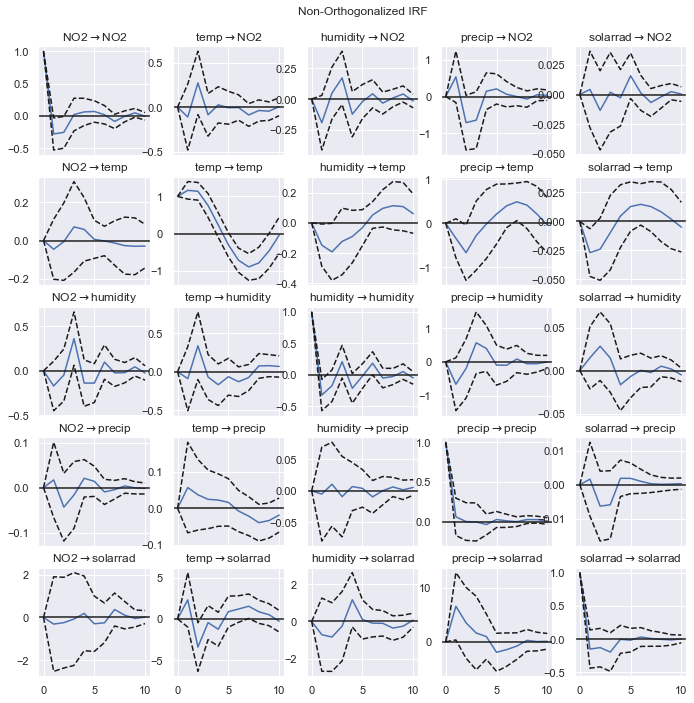

In [62]:
# IRF
from statsmodels.tsa.api import VAR

weather_df = weather_df.rename(columns={'Nitrogen dioxide': 'NO2'})
weather_df = weather_df.rename(columns={'solarradiation': 'solarrad'})
model = VAR(weather_df)
results = model.fit(maxlags=3)
irf = results.irf(10)  # 10-period IRF

# Plot the non-orthogonalized Impulse Response Function (IRF)
irf.plot(orth=False)
plt.suptitle("Non-Orthogonalized IRF")
plt.savefig('Non- Orthogonal IRF .png')
plt.show()



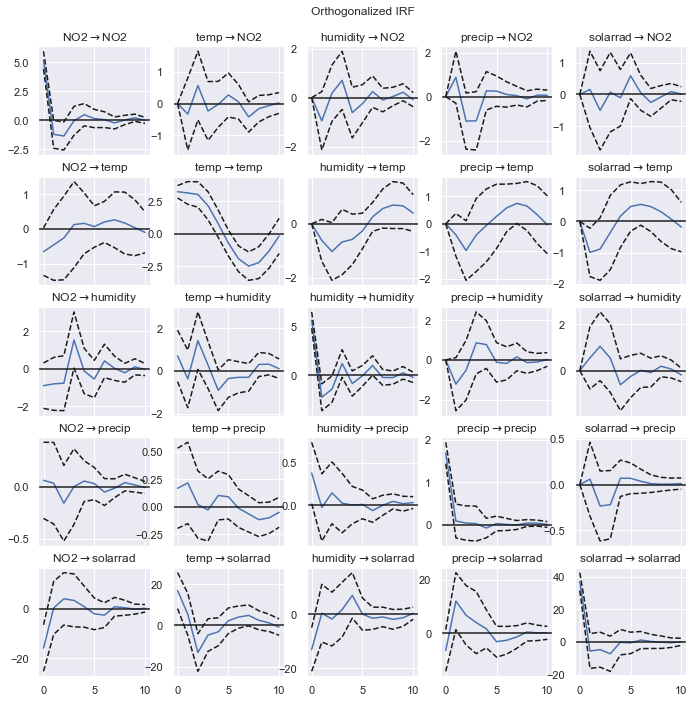

In [63]:
# Plot the orthogonalized Impulse Response Function (IRF)
irf.plot(orth=True)
plt.suptitle("Orthogonalized IRF")
plt.savefig("Orthogonal IRF.png")
plt.show()


# We need only impact of other columns on NO2 

In [64]:
# CHECKING IMPACT OF WEATHER PARAMETERS ON NO2
max_lag = 3
test_result = grangercausalitytests(weather_df[['humidity','NO2']], max_lag, verbose=True)

# Interpreting the results
for lag in range(1, max_lag + 1):
    f_test_pvalue = test_result[lag][0]['ssr_ftest'][1]
    print(f'Lag = {lag}: F-test p-value = {f_test_pvalue}')
    if f_test_pvalue < 0.05:
        print(f'Humidity Granger-causes NO2 at lag {lag} (reject H0)')
    else:
        print(f'Humidity does not Granger-cause NO2 at lag {lag} (fail to reject H0)')


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6404  , p=0.1078  , df_denom=86, df_num=1
ssr based chi2 test:   chi2=2.7325  , p=0.0983  , df=1
likelihood ratio test: chi2=2.6914  , p=0.1009  , df=1
parameter F test:         F=2.6404  , p=0.1078  , df_denom=86, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.7873  , p=0.0044  , df_denom=83, df_num=2
ssr based chi2 test:   chi2=12.2719 , p=0.0022  , df=2
likelihood ratio test: chi2=11.4883 , p=0.0032  , df=2
parameter F test:         F=5.7873  , p=0.0044  , df_denom=83, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.3128  , p=0.0241  , df_denom=80, df_num=3
ssr based chi2 test:   chi2=10.8080 , p=0.0128  , df=3
likelihood ratio test: chi2=10.1875 , p=0.0170  , df=3
parameter F test:         F=3.3128  , p=0.0241  , df_denom=80, df_num=3
Lag = 1: F-test p-value = 0.10783518248893532
Humidity does not Granger-cause NO2 at lag 1 (fail to 

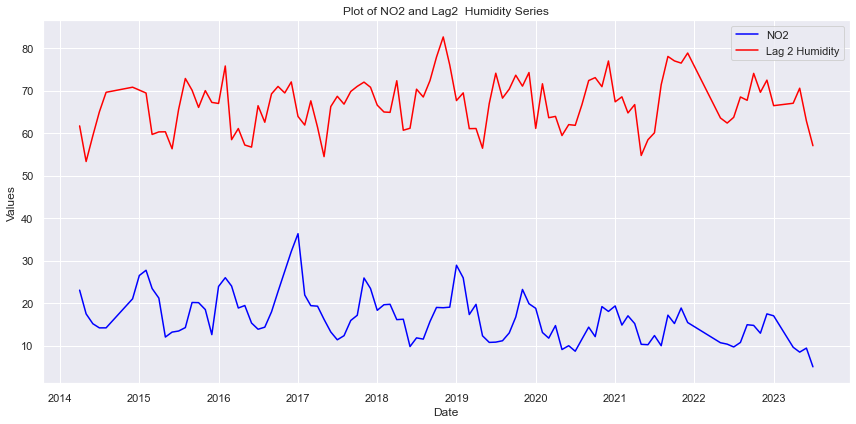

In [65]:
# BUT VAR MODEL SHOwS LAGS OF HUMIDITY DOES NOT HAVE IMPACT ON NO2. WE CAN CHECK USING TIMESERIES PLOT


# Copy DataFrame and create lagged columns
df_temp = monthly_mean_df.copy()
df_temp['Lag2 Humidity'] = df_temp['humidity'].shift(2)
df_temp['Lag3 Humidity'] = df_temp['humidity'].shift(3)
df_temp = df_temp.dropna()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_temp.index, df_temp['Nitrogen dioxide'], label='NO2', color='blue')
plt.plot(df_temp.index, df_temp['Lag2 Humidity'], label='Lag 2 Humidity', color='red')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Plot of NO2 and Lag2  Humidity Series')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


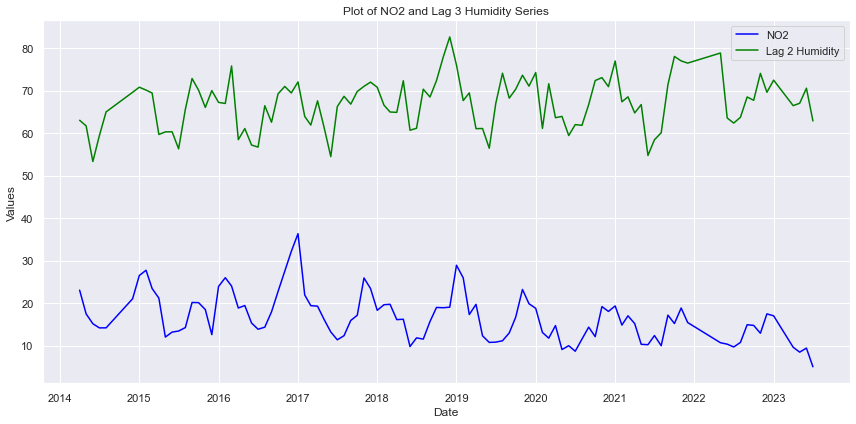

In [66]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_temp.index, df_temp['Nitrogen dioxide'], label='NO2', color='blue')
plt.plot(df_temp.index, df_temp['Lag3 Humidity'], label='Lag 2 Humidity', color='green')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Plot of NO2 and Lag 3 Humidity Series')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

From these plots , its evident that L2 and L3 of humidity have an impact on NO2 levls which is supported by 
Granger- causality test even though the var model or IRF plot says otherwise. 

Reasons why var model gave high p value :
    
May be due to multicollinearity
No statistically significant relationship: The p-values indicate that the relationship between humidity lags and NO2 levels is not statistically significant at the 5% level.
2. Practical significance vs. statistical significance: Although the relationship may not be statistically significant, it could still be practically significant. Consider the effect size and the context of your research.
3. Model limitations: The VAR model might not be capturing the underlying relationships accurately. Consider alternative models or techniques.
4. Multicollinearity: If the humidity lags are highly correlated with each other, it could lead to inflated p-values. Check for multicollinearity and consider using dimensionality reduction techniques.
5. Sample size: If the sample size is small, it may not be possible to detect statistically significant relationships. Consider collecting more data.


In [67]:
# Impact of no2 on weather parameters
test_result = grangercausalitytests(weather_df[['NO2', 'humidity']], maxlag=3, verbose=True)
print(test_result)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7757  , p=0.3809  , df_denom=86, df_num=1
ssr based chi2 test:   chi2=0.8027  , p=0.3703  , df=1
likelihood ratio test: chi2=0.7991  , p=0.3714  , df=1
parameter F test:         F=0.7757  , p=0.3809  , df_denom=86, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7459  , p=0.4775  , df_denom=83, df_num=2
ssr based chi2 test:   chi2=1.5817  , p=0.4535  , df=2
likelihood ratio test: chi2=1.5676  , p=0.4567  , df=2
parameter F test:         F=0.7459  , p=0.4775  , df_denom=83, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0249  , p=0.3861  , df_denom=80, df_num=3
ssr based chi2 test:   chi2=3.3439  , p=0.3416  , df=3
likelihood ratio test: chi2=3.2812  , p=0.3503  , df=3
parameter F test:         F=1.0249  , p=0.3861  , df_denom=80, df_num=3
{1: ({'ssr_ftest': (0.7756589792078041, 0.3809267324559188, 86.0, 1), 'ssr_chi2test': (0.80271685057

In [68]:
weather_df.head()

,NO2,temp,humidity,precip,solarrad
YearMonth,,,,,
2015-08-01,6.388172,23.406452,-9.635699,1.828613,-51.513441
2015-09-01,8.225806,20.786667,-0.658280,4.135800,-79.159462
2015-10-01,0.935484,11.890323,-3.967527,3.315323,-33.050215
2015-11-01,-1.635484,9.473333,0.426416,1.963133,-30.087563
2015-12-01,-12.728571,7.689286,9.512063,3.274607,156.402540


In [69]:
# var after reducing multicollinearity

model = VAR(df_2)
results = model.fit(maxlags=3)
results.summary()

D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 30, Aug, 2024
Time:                     16:21:35
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    20.3685
Nobs:                     90.0000    HQIC:                   19.0425
Log likelihood:          -1375.11    FPE:                7.74789e+07
AIC:                      18.1464    Det(Omega_mle):     3.41874e+07
--------------------------------------------------------------------
Results for equation Nitrogen dioxide
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       1.837711         2.058178            0.893           0.372
L1.Nitrogen dioxide        -0.276783         0.124866           -2.217           0.027
L1.temp                  

D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


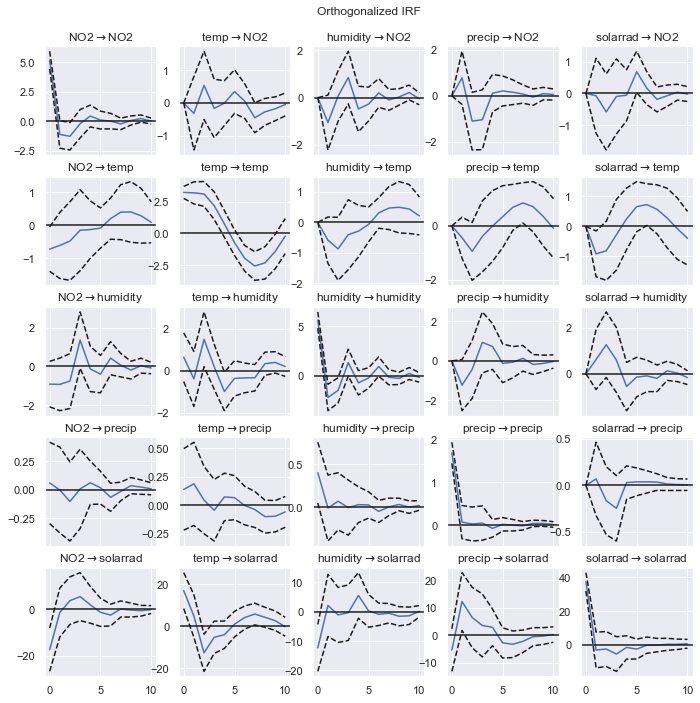

In [70]:
#IRF 

# IRF
df_irf=df_2.copy()
from statsmodels.tsa.api import VAR

df_irf = df_irf.rename(columns={'Nitrogen dioxide': 'NO2'})
df_irf = df_irf.rename(columns={'solarradiation': 'solarrad'})
model = VAR(df_irf)
results = model.fit(maxlags=3)
irf = results.irf(10)  # 10-period IRF

# Plot the orthogonalized Impulse Response Function (IRF)
irf.plot(orth=True)
plt.suptitle("Orthogonalized IRF")
#plt.savefig('Orthogonal IRF .png')
plt.show()


# GRANGER RESULTS : EFFECT OF NO2 ON VARAIBLES

NO EFFECT OF NO2 ON WEATHER PARAMETERS


In [71]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen


# Focus on 'nitrogen' and 'humidity'
data = df_englegranger[['Nitrogen dioxide', 'temp']]

# Function to check stationarity
def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')
    if result[1] > 0.05:
        print("The series is non-stationary")
    else:
        print("The series is stationary")

# Check stationarity of both series
print("Checking stationarity for Nitrogen dioxide:")
check_stationarity(data['Nitrogen dioxide'])
print("\nChecking stationarity for Temperature:")
check_stationarity(data['temp'])

# Engle-Granger Two-Step Procedure
def engle_granger_test(data):
    # Step 1: OLS Regression
    y = data['Nitrogen dioxide']
    X = sm.add_constant(data['temp'])
    model = sm.OLS(y, X).fit()
    residuals = model.resid

    # Step 2: ADF Test on Residuals
    result = adfuller(residuals)
    print('Engle-Granger Test')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')
    if result[1] > 0.05:
        print("The residuals are non-stationary - no cointegration")
    else:
        print("The residuals are stationary - cointegration exists")

# Johansen Test
def johansen_test(data, max_lag=10):
    # Fit VAR model to data
    model = VAR(data)
    lag_order = model.select_order(max_lag)
    best_lag = lag_order.aic
    
    # Johansen cointegration test
    johansen_test = coint_johansen(data, det_order=0, k_ar_diff=best_lag)
    
    print('Johansen Test')
    print(f'Trace Statistic: {johansen_test.lr1}')
    print(f'Trace Critical Values: {johansen_test.cvt}')
    print(f'Eigenvalue Statistic: {johansen_test.lr2}')
    print(f'Eigenvalue Critical Values: {johansen_test.cvm}')

# Running the tests
print("\nRunning Engle-Granger Test:")
engle_granger_test(data)
print("\nRunning Johansen Test:")
johansen_test(data)


Checking stationarity for Nitrogen dioxide:
ADF Statistic: -0.08512330955831011
p-value: 0.9509002970243141
Critical Value 1%: -3.503514579651927
Critical Value 5%: -2.893507960466837
Critical Value 10%: -2.583823615311909
The series is non-stationary

Checking stationarity for Temperature:
ADF Statistic: -9.322791900503626
p-value: 9.789865839010548e-16
Critical Value 1%: -3.4961490537199116
Critical Value 5%: -2.8903209639580556
Critical Value 10%: -2.5821223452518263
The series is stationary

Running Engle-Granger Test:
Engle-Granger Test
ADF Statistic: -5.294942714441086
p-value: 5.609289472248847e-06
Critical Value 1%: -3.4942202045135513
Critical Value 5%: -2.889485291005291
Critical Value 10%: -2.5816762131519275
The residuals are stationary - cointegration exists

Running Johansen Test:
Johansen Test
Trace Statistic: [48.30615096  5.17581964]
Trace Critical Values: [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Eigenvalue Statistic: [43.13033132  5.17581964]
Eigenvalue 

D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


#### Temperature is cointegrated with NO2 :
1)When time series are cointegrated, it means that there is a long-term equilibrium relationship between the series, even though they may individually be non-stationary. In such cases, it's crucial to use modeling approaches that explicitly account for this cointegration to ensure accurate representation and forecasting. Vector Error Correction Models (VECM) are one such approach.

2)Cointegration itself does not directly imply that a change in one variable impacts another variable in a causal sense. Rather, it indicates that two or more variables share a common long-term equilibrium relationship despite being non-stationary individually. However, it does suggest that there is a stable, long-term relationship between the variables that can be exploited to understand their interaction.

3)Cointegration does not directly imply causality. It indicates a long-term relationship but does not specify the direction or strength of causal impact between the variables.To determine if changes in one variable cause changes in another, you would need to conduct Granger causality tests. These tests help identify whether one time series provides useful information for predicting another.

4)While cointegration itself does not indicate the direction of impact, it does imply that if there is a significant shock to one of the cointegrated variables, the other variable(s) will adjust to restore the equilibrium relationship.
In practice, understanding the long-term relationship can provide insights into how variables interact. For example, if 'GDP' and 'Unemployment Rate' are cointegrated, it suggests that they are linked in a way that any shock to GDP will eventually have a predictable effect on the Unemployment Rate, and vice versa.

5)Keep in mind that cointegration does not imply:

1. Causality: Cointegration does not necessarily imply causality between the series.
2. Constant correlation: Correlation between the series may not be constant over time.

6) it's possible for temperature and NO2 levels to be cointegrated despite their apparent opposite seasonal patterns. Cointegration doesn't necessarily imply a straightforward positive or negative correlation.

In this case, the cointegration might be due to underlying factors that drive both temperature and NO2 levels, such as:

1. Seasonal patterns in human activity: During winter, people may use more fuel for heating, leading to increased NO2 emissions, while in summer, there may be more outdoor activities, reducing the need for heating and resulting in lower NO2 levels.
2. Weather patterns: Temperature and NO2 levels might be influenced by similar weather patterns, such as high-pressure systems or temperature inversions, which can trap pollutants and lead to higher NO2 concentrations.
3. Urban planning and infrastructure: The urban heat island effect, building density, and transportation infrastructure might contribute to both temperature and NO2 level patterns.

The cointegration suggests that there's a long-term equilibrium relationship between temperature and NO2 levels, even if they appear to move in opposite directions seasonally. This relationship might be driven by these underlying factors.


(FRom the TS plot of NO2 we can see that no2 levels higher in winter and lower in winter)
    

In [72]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Load your data
# Assuming 'df_englegranger' is your DataFrame with 'NO2' and other variables
# df_englegranger = pd.read_csv('path_to_your_data.csv')

# Function to perform the ADF test and print results
def adf_test(series, name=''):
    result = adfuller(series)
    print(f'ADF Statistic for {name}: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')
    print('Stationary' if result[1] < 0.05 else 'Non-Stationary')
    print('')

# Check if 'NO2' and other variables are non-stationary
for column in df_englegranger.columns:
    if column != 'Nitrogen dioxide':
        adf_test(df_englegranger[column], name=column)

# Function to perform the Engle-Granger test
def engle_granger_test(y, X):
    # Perform OLS regression
    model = sm.OLS(y, sm.add_constant(X)).fit()
    residuals = model.resid
    
    # Perform ADF test on residuals
    result = adfuller(residuals)
    print(f'Engle-Granger Test for {X.name}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')
    if result[1] < 0.05:
        print('Cointegration exists')
    else:
        print('No cointegration')
    print('')

# Run Engle-Granger test for 'NO2' with all other variables
for column in df_englegranger.columns:
    if column != 'Nitrogen dioxide':
        engle_granger_test(df_englegranger['Nitrogen dioxide'], df_englegranger[column])


ADF Statistic for temp: -9.322791900503626
p-value: 9.789865839010548e-16
Critical Value 1%: -3.4961490537199116
Critical Value 5%: -2.8903209639580556
Critical Value 10%: -2.5821223452518263
Stationary

ADF Statistic for dew: -9.737675392333005
p-value: 8.662334148862683e-17
Critical Value 1%: -3.4961490537199116
Critical Value 5%: -2.8903209639580556
Critical Value 10%: -2.5821223452518263
Stationary

ADF Statistic for humidity: -1.9035431654883486
p-value: 0.3303961341278
Critical Value 1%: -3.503514579651927
Critical Value 5%: -2.893507960466837
Critical Value 10%: -2.583823615311909
Non-Stationary

ADF Statistic for precip: -9.638321477046357
p-value: 1.5449614128400641e-16
Critical Value 1%: -3.4942202045135513
Critical Value 5%: -2.889485291005291
Critical Value 10%: -2.5816762131519275
Stationary

ADF Statistic for precipprob: -9.538901484026534
p-value: 2.7605476393175967e-16
Critical Value 1%: -3.4942202045135513
Critical Value 5%: -2.889485291005291
Critical Value 10%: -2.58

In [73]:
df_today =df_englegranger[["temp","dew","snow","windspeed","sealevelpressure","solarradiation","solarenergy","uvindex"]]

In [74]:
df_today.corr()

,temp,dew,snow,windspeed,sealevelpressure,solarradiation,solarenergy,uvindex
temp,1.000000,0.990377,-0.583900,-0.840023,-0.452366,0.676578,0.676229,0.711483
dew,0.990377,1.000000,-0.583415,-0.871661,-0.422671,0.597936,0.597538,0.633759
snow,-0.583900,-0.583415,1.000000,0.510137,0.152212,-0.231241,-0.231359,-0.227687
windspeed,-0.840023,-0.871661,0.510137,1.000000,0.232303,-0.455830,-0.455440,-0.481261
sealevelpressure,-0.452366,-0.422671,0.152212,0.232303,1.000000,-0.497771,-0.497785,-0.492417
solarradiation,0.676578,0.597936,-0.231241,-0.455830,-0.497771,1.000000,0.999991,0.973219
solarenergy,0.676229,0.597538,-0.231359,-0.455440,-0.497785,0.999991,1.000000,0.973190
uvindex,0.711483,0.633759,-0.227687,-0.481261,-0.492417,0.973219,0.973190,1.000000


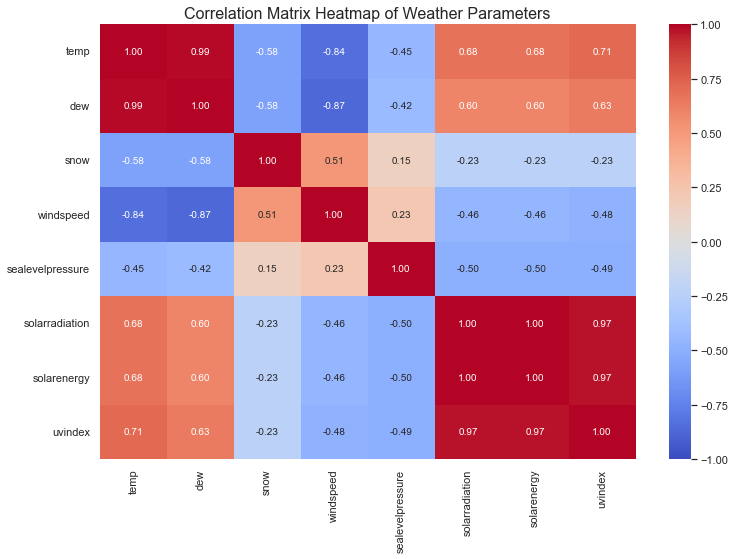

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix
correlation_matrix = df_today.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))  

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# Customize the plot
plt.title('Correlation Matrix Heatmap of Weather Parameters', fontsize=16)  # Increase font size

plt.savefig('Heatmap.png')

plt.show()


In [76]:
df_finalised = df_today[["temp","sealevelpressure"]]

In [77]:
df_finalised.corr()

,temp,sealevelpressure
temp,1.000000,-0.452366
sealevelpressure,-0.452366,1.000000


In [78]:
vif_df = calculate_vif(df_finalised)
print(vif_df)

           Variable       VIF
0              temp  2.849287
1  sealevelpressure  2.849287


In [79]:
df_vecmfit = df_qwerty[["temp","sealevelpressure","Nitrogen dioxide"]]

In [80]:
df_vecmfit.corr()

,temp,sealevelpressure,Nitrogen dioxide
temp,1.000000,-0.441461,0.06212
sealevelpressure,-0.441461,1.000000,0.02808
Nitrogen dioxide,0.062120,0.028080,1.00000


In [81]:
vif_df = calculate_vif(df_vecmfit)
print(vif_df)

           Variable       VIF
0              temp  3.312576
1  sealevelpressure  3.309803
2  Nitrogen dioxide  1.003876


In [82]:
# lag selection 


from statsmodels.tsa.vector_ar.vecm import select_order

# Assuming df_vecmfit is your data
lag_selection = select_order(df_vecmfit, maxlags=15, deterministic="ci")
print(lag_selection.summary())

 VECM Order Selection (* highlights the minimums) 
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        8.314       8.771       4085.       8.497
1        7.665      8.395*       2137.      7.957*
2        7.664       8.669       2143.       8.066
3        7.611       8.889      2044.*       8.122
4        7.759       9.312       2395.       8.380
5        7.851       9.677       2664.       8.581
6        7.981       10.08       3093.       8.821
7        8.059       10.43       3435.       9.009
8        8.189       10.84       4049.       9.249
9        7.783       10.71       2818.       8.952
10       7.666       10.86       2646.       8.944
11       7.631       11.10       2735.       9.019
12       7.563       11.31       2779.       9.061
13      7.509*       11.53       2917.       9.116
14       7.582       11.87       3559.       9.299
15       7.729       12.29       4807.       9.555
-------------------------------

D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Software\lib\site-packages\statsmodel

In [83]:
#VECM

from statsmodels.tsa.vector_ar.vecm import VECM

# Fit the VECM model
vecm = VECM(df_vecmfit, k_ar_diff=1, coint_rank=1)
vecm_fit = vecm.fit()

# Summary of the VECM model
print(vecm_fit.summary())


  Det. terms outside the coint. relation & lagged endog. parameters for equation temp  
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
L1.temp                 0.4666      0.090      5.199      0.000       0.291       0.643
L1.sealevelpressure    -0.2963      0.141     -2.102      0.036      -0.573      -0.020
L1.Nitrogen dioxide     0.0876      0.081      1.076      0.282      -0.072       0.247
Det. terms outside the coint. relation & lagged endog. parameters for equation sealevelpressure
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
L1.temp                -0.1260      0.058     -2.171      0.030      -0.240      -0.012
L1.sealevelpressure    -0.3700      0.091     -4.057      0.000      -0.549      -0.191
L1.Nitrogen dioxide    -

D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [84]:
# The p value for both temp and sealvelressure is high so these doesnot share long term equilbrium with no2.

In [85]:
from statsmodels.stats.diagnostic import acorr_ljungbox
residuals = vecm_fit.resid
n_vars = residuals.shape[1]
for i in range(n_vars):
    lb_test = acorr_ljungbox(residuals[:, i], lags=[1], return_df=True)
    print(f'Ljung-Box test for Variable {i + 1}:')
    print(lb_test)


Ljung-Box test for Variable 1:
   lb_stat  lb_pvalue
1  0.11783   0.731401
Ljung-Box test for Variable 2:
    lb_stat  lb_pvalue
1  1.605785   0.205085
Ljung-Box test for Variable 3:
    lb_stat  lb_pvalue
1  0.056038   0.812872


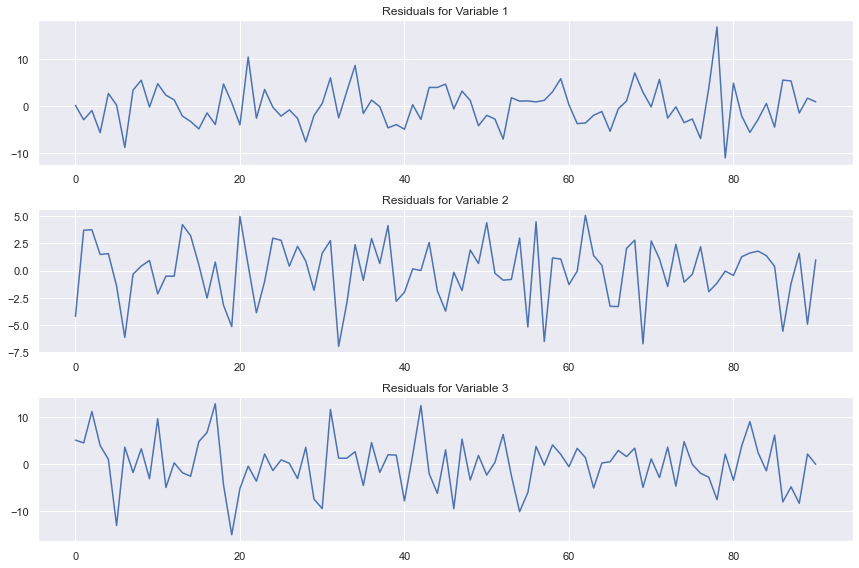

In [86]:


# Plot residuals
plt.figure(figsize=(12, 8))
for i in range(n_vars):
    plt.subplot(n_vars, 1, i + 1)
    plt.plot(residuals[:, i])
    plt.title(f'Residuals for Variable {i + 1}')
plt.tight_layout()
plt.show()

Cointegration varaiables and lagged values of humidity can help model long term patterns
Since cointegration exist , we can use VCEM 
Define a new df with cointegration variables which donot cause multicollinearity and humidity lags

df_cointegration= df_test2[["Nitrogen dioxide","dew","humidity","snow","windspeed","solarradiation",sealevelpressure","temp"]]

In [87]:
df_cointegration = df_qwerty[["Nitrogen dioxide", "humidity", "snow", "windspeed", "solarradiation","temp"]]


In [88]:
df_cointegration.corr() #..............................................................................

,Nitrogen dioxide,humidity,snow,windspeed,solarradiation,temp
Nitrogen dioxide,1.000000,-0.079438,0.054872,0.018143,-0.299461,0.062120
humidity,-0.079438,1.000000,-0.120638,-0.246982,-0.235986,0.145345
snow,0.054872,-0.120638,1.000000,0.552754,0.008448,-0.515561
windspeed,0.018143,-0.246982,0.552754,1.000000,0.126498,-0.859740
solarradiation,-0.299461,-0.235986,0.008448,0.126498,1.000000,-0.151112
temp,0.062120,0.145345,-0.515561,-0.859740,-0.151112,1.000000


In [89]:
vif_df = calculate_vif(df_cointegration)
print(vif_df)

           Variable       VIF
0  Nitrogen dioxide  1.133080
1          humidity  1.111908
2              snow  1.654821
3         windspeed  3.860611
4    solarradiation  1.207412
5              temp  3.179906


In [90]:

df_qwerty['humidity_lag2'] = df_qwerty['humidity'].shift(2)
df_qwerty['humidity_lag3'] = df_qwerty['humidity'].shift(3)
df_xyz=df_qwerty.copy()
df_xyz["humidity_lag1"]= df_qwerty["humidity"].shift(1)
df_secondtesthumidity =pd.concat([df_cointegration,df_xyz["humidity_lag1"]],axis=1)
df_secondtesthumidity= df_secondtesthumidity.dropna()
df_secondtesthumidity.drop(columns=['humidity'],inplace=True)

df_secondtesthumidity2=pd.concat([df_cointegration,df_xyz["humidity_lag1"],df_xyz["humidity_lag3"]],axis=1)
df_secondtesthumidity2= df_secondtesthumidity2.dropna()
#df_secondtesthumidity2.drop(columns=['humidity'],inplace=True)

# Drop the original 'humidity' column
df_cointegration = pd.concat([df_cointegration, df_qwerty["humidity_lag2"],df_qwerty["humidity_lag3"]], axis=1)
df_last=pd.concat([df_cointegration,df_xyz["humidity_lag1"]],axis=1)
df_last2=df_last.copy()
df_last.drop(columns=["humidity","humidity_lag3"],inplace=True)
df_humidity02=df_cointegration.copy()
df_no2humid = pd.concat([df_cointegration["Nitrogen dioxide"],df_xyz["humidity_lag1"]],axis=1)
df_no2humid=df_no2humid.dropna()
#df_no2humid.drop(columns=['humidity'],inplace=True)

df_cointegration.drop(columns=['humidity'],inplace=True)
df_cointegration=df_cointegration.dropna()



In [91]:
# humidity + lag 2


df_humidity02.drop(columns=["humidity_lag3"],inplace=True)
df_humidity02=df_humidity02.dropna()
df_humidity02.head()

,Nitrogen dioxide,humidity,snow,windspeed,solarradiation,temp,humidity_lag2
YearMonth,,,,,,,
2015-07-01,6.800000,-8.842903,0.0,18.325806,-24.283226,23.422581,10.592158
2015-08-01,6.388172,-9.635699,0.0,18.929032,-51.513441,23.406452,15.651068
2015-09-01,8.225806,-0.658280,0.0,19.293333,-79.159462,20.786667,-8.842903
2015-10-01,0.935484,-3.967527,0.0,21.345161,-33.050215,11.890323,-9.635699
2015-11-01,-1.635484,0.426416,0.0,21.776667,-30.087563,9.473333,-0.658280


In [92]:
df_no2humid.head()

,Nitrogen dioxide,humidity_lag1
YearMonth,,
2015-06-01,-11.521121,10.592158
2015-07-01,6.800000,15.651068
2015-08-01,6.388172,-8.842903
2015-09-01,8.225806,-9.635699
2015-10-01,0.935484,-0.658280


In [93]:
df_cointegration.isna().sum()


Nitrogen dioxide    0
snow                0
windspeed           0
solarradiation      0
temp                0
humidity_lag2       0
humidity_lag3       0
dtype: int64

In [94]:
vif_df = calculate_vif(df_cointegration)
print(vif_df)

# We added humidity lags and toook all cointegrated columns and checked vif , since theres high vif, we removed a few columns based on
#correlation matrix, and dropped humidity column ; now no multicollinearity
# No multicollinearity

           Variable       VIF
0  Nitrogen dioxide  1.183670
1              snow  1.733665
2         windspeed  3.878513
3    solarradiation  1.181777
4              temp  3.123533
5     humidity_lag2  1.126365
6     humidity_lag3  1.115022


In [95]:
vif_df2=calculate_vif(df_secondtesthumidity)
print(vif_df2)

           Variable       VIF
0  Nitrogen dioxide  1.122756
1              snow  1.668985
2         windspeed  3.884728
3    solarradiation  1.130573
4              temp  3.208225
5     humidity_lag1  1.049676


In [96]:
# combination of lag 1 and 3.
vif_df3=calculate_vif(df_secondtesthumidity2)
print(vif_df3)

           Variable       VIF
0  Nitrogen dioxide  1.211243
1          humidity  1.145595
2              snow  1.677207
3         windspeed  3.881675
4    solarradiation  1.227666
5              temp  3.175978
6     humidity_lag1  1.146904
7     humidity_lag3  1.164552


In [97]:

vif_df4=calculate_vif(df_humidity02)
print(vif_df4)

           Variable       VIF
0  Nitrogen dioxide  1.164863
1          humidity  1.195154
2              snow  1.731596
3         windspeed  3.953085
4    solarradiation  1.266914
5              temp  3.214091
6     humidity_lag2  1.193744


In [98]:

# FINAL 
df_last=df_last.dropna()
vif_df5=calculate_vif(df_last)
print(vif_df5)

           Variable       VIF
0  Nitrogen dioxide  1.161503
1              snow  1.765058
2         windspeed  4.014437
3    solarradiation  1.180833
4              temp  3.281852
5     humidity_lag2  1.122109
6     humidity_lag1  1.080986


In [99]:
df_last.corr()


,Nitrogen dioxide,snow,windspeed,solarradiation,temp,humidity_lag2,humidity_lag1
Nitrogen dioxide,1.000000,0.045611,-0.006884,-0.353981,0.085580,0.087005,-0.074077
snow,0.045611,1.000000,0.552100,0.001765,-0.513264,0.149153,0.008031
windspeed,-0.006884,0.552100,1.000000,0.107816,-0.859458,0.002201,-0.067788
solarradiation,-0.353981,0.001765,0.107816,1.000000,-0.139494,-0.149403,-0.014907
temp,0.085580,-0.513264,-0.859458,-0.139494,1.000000,0.094751,0.143988
humidity_lag2,0.087005,0.149153,0.002201,-0.149403,0.094751,1.000000,-0.165673
humidity_lag1,-0.074077,0.008031,-0.067788,-0.014907,0.143988,-0.165673,1.000000


# Final checking before vecm
1) whether statioanary 
2) whether cointegration exist.



In [100]:
# ENGLE GRANGR TEST
# Function to perform the ADF test and print results
def adf_test(series, name=''):
    result = adfuller(series)
    print(f'ADF Statistic for {name}: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')
    print('Stationary' if result[1] < 0.05 else 'Non-Stationary')
    print('')

# Check if 'NO2' and other variables are non-stationary
for column in df_cointegration.columns:
    if column != 'Nitrogen dioxide':
        adf_test(df_cointegration[column], name=column)

# Function to perform the Engle-Granger test
def engle_granger_test(y, X):
    # Perform OLS regression
    model = sm.OLS(y, sm.add_constant(X)).fit()
    residuals = model.resid
    
    # Perform ADF test on residuals
    result = adfuller(residuals)
    print(f'Engle-Granger Test for {X.name}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')
    if result[1] < 0.05:
        print('Cointegration exists')
    else:
        print('No cointegration')
    print('')

# Run Engle-Granger test for 'NO2' with all other variables
for column in df_cointegration.columns:
    if column != 'Nitrogen dioxide':
        engle_granger_test(df_cointegration['Nitrogen dioxide'], df_cointegration[column])


ADF Statistic for snow: -7.655918615663862
p-value: 1.7392339211358234e-11
Critical Value 1%: -3.506057133647011
Critical Value 5%: -2.8946066061911946
Critical Value 10%: -2.5844100201994697
Stationary

ADF Statistic for windspeed: -6.391056500436397
p-value: 2.105454413193458e-08
Critical Value 1%: -3.510711795769895
Critical Value 5%: -2.8966159448223734
Critical Value 10%: -2.5854823866213152
Stationary

ADF Statistic for solarradiation: -3.5122274970536482
p-value: 0.007678563241397657
Critical Value 1%: -3.517113604831504
Critical Value 5%: -2.8993754262546574
Critical Value 10%: -2.5869547797501644
Stationary

ADF Statistic for temp: -9.668991995545628
p-value: 1.2920422039733722e-16
Critical Value 1%: -3.5087828609430614
Critical Value 5%: -2.895783561573195
Critical Value 10%: -2.5850381719848565
Stationary

ADF Statistic for humidity_lag2: -6.852799202563819
p-value: 1.6775282716797239e-09
Critical Value 1%: -3.5117123057187376
Critical Value 5%: -2.8970475206326833
Critical 

In [101]:
# Check correlation matrix for multicollinearity
correlation_matrix = df_cointegration.corr()
correlation_matrix

,Nitrogen dioxide,snow,windspeed,solarradiation,temp,humidity_lag2,humidity_lag3
Nitrogen dioxide,1.000000,0.051378,0.011810,-0.350956,0.069732,0.067918,0.194439
snow,0.051378,1.000000,0.552374,-0.000310,-0.512735,0.158146,-0.115016
windspeed,0.011810,0.552374,1.000000,0.101805,-0.856711,0.026398,-0.144330
solarradiation,-0.350956,-0.000310,0.101805,1.000000,-0.134215,-0.143446,-0.112060
temp,0.069732,-0.512735,-0.856711,-0.134215,1.000000,0.074665,0.085702
humidity_lag2,0.067918,0.158146,0.026398,-0.143446,0.074665,1.000000,-0.207139
humidity_lag3,0.194439,-0.115016,-0.144330,-0.112060,0.085702,-0.207139,1.000000


In [102]:
df_coin2=df_cointegration.copy()
df_cointegration.drop(columns="windspeed",inplace=True)

# small multi collinearity found  between temp and windspeed, so dropped windspeed

In [103]:
#VECM

from statsmodels.tsa.vector_ar.vecm import VECM

# Fit the VECM model
vecm = VECM(df_cointegration, k_ar_diff=1, coint_rank=1)
vecm_fit = vecm.fit()

# Summary of the VECM model
print(vecm_fit.summary())


Det. terms outside the coint. relation & lagged endog. parameters for equation Nitrogen dioxide
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
L1.Nitrogen dioxide     0.2753      0.093      2.976      0.003       0.094       0.457
L1.snow                 2.3706      3.252      0.729      0.466      -4.003       8.745
L1.solarradiation      -0.0135      0.009     -1.500      0.134      -0.031       0.004
L1.temp                 0.1207      0.107      1.127      0.260      -0.089       0.331
L1.humidity_lag2       -1.7135      0.173     -9.923      0.000      -2.052      -1.375
L1.humidity_lag3       -0.4089      0.066     -6.182      0.000      -0.539      -0.279
  Det. terms outside the coint. relation & lagged endog. parameters for equation snow  
                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------

D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### SEPARATELY CHECK HUMIDITY AND NO2 IN VECM ,SO THAT L1.HUMIDITY = lag2 humidity. So we can find lag 2 humidity has impact accordimg to vecm

# Interpreting the Results:

DOUBT
Significant Variables: Variables with low p-values (typically less than 0.05) are statistically significant. For instance, L1.Nitrogen dioxide and L1.humidity_lag2( actually humidity lag 3) in the Nitrogen dioxide equation are significant.
Loading Coefficients: Significant loading coefficients suggest that the variable adjusts quickly to the long-term equilibrium. For example, Nitrogen dioxide has a significant loading coefficient, indicating it responds strongly to deviations from equilibrium.
Cointegration Relationships: Significant beta coefficients indicate strong long-term relationships. For example, beta.3 is significant, suggesting that the relationship captured by this coefficient is important.

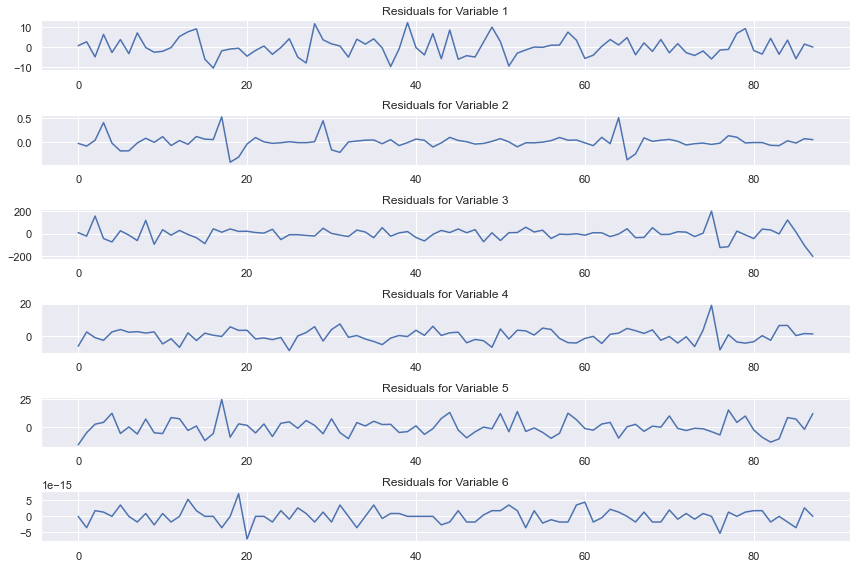

In [104]:
# CHECKS TO KNOW WHETHER VECM IS PERFECT SELECTION

#1)Residual Analysis: 
    
#Check residual plots and autocorrelation to ensure residuals behave like white noise
from statsmodels.tsa.vector_ar.vecm import VECM


residuals = vecm_fit.resid
# Assuming residuals is a 2D numpy array with shape (n_observations, n_variables)
n_vars = residuals.shape[1]  # Number of variables

# Plot residuals
plt.figure(figsize=(12, 8))
for i in range(n_vars):
    plt.subplot(n_vars, 1, i + 1)
    plt.plot(residuals[:, i])
    plt.title(f'Residuals for Variable {i + 1}')
plt.tight_layout()
plt.show()



White noise is a statistical term used to describe a sequence of random variables with several key characteristics. In the context of residual analysis for time series models, residuals that behave like white noise imply that the model has adequately captured the underlying structure of the data, leaving only random noise.

Characteristics of White Noise
Zero Mean: The average value of the series is zero.
Constant Variance: The variability of the series is constant over time (homoscedasticity).
No Autocorrelation: There is no predictable pattern or relationship between values at different times (i.e., the autocorrelations are essentially zero at all lags).

Residuals as White Noise
In time series models, if the residuals from your model (the differences between the actual and fitted values) behave like white noise, it suggests that the model has captured all significant patterns in the data. Residuals that exhibit white noise characteristics typically imply that:

Model Adequacy: The model is likely to be appropriate and well-specified.
No Further Structure: There are no remaining autocorrelations or patterns that the model has missed.

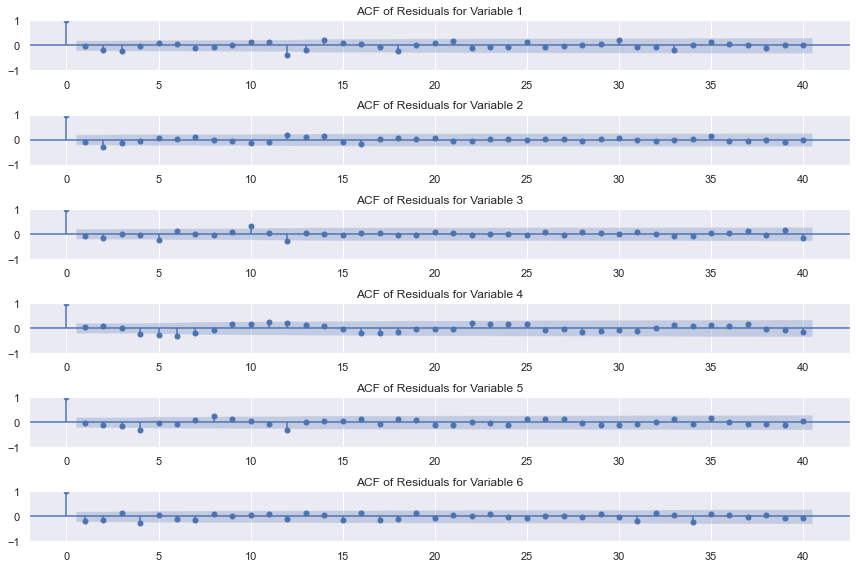

In [105]:
# 3) ACF TEST 

#ACF Plot: Compute and plot the ACF of residuals to ensure there are no significant autocorrelations. For white noise,
#ACF values should be close to zero at all lags, with confidence intervals around zero.
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12, 8))
for i in range(n_vars):
    plt.subplot(n_vars, 1, i + 1)
    plot_acf(residuals[:, i], lags=40, ax=plt.gca(), title=f'ACF of Residuals for Variable {i + 1}')
plt.tight_layout()
plt.show()


In [106]:
# 4) 
from statsmodels.stats.diagnostic import acorr_ljungbox

for i in range(n_vars):
    lb_test = acorr_ljungbox(residuals[:, i], lags=[1], return_df=True)
    print(f'Ljung-Box test for Variable {i + 1}:')
    print(lb_test)

    
# AT LAG = 1 ,p values are greater than 0.05 , that means no autocorrelation , so model is good.

Ljung-Box test for Variable 1:
    lb_stat  lb_pvalue
1  0.084856   0.770821
Ljung-Box test for Variable 2:
    lb_stat  lb_pvalue
1  0.834678   0.360923
Ljung-Box test for Variable 3:
    lb_stat  lb_pvalue
1  1.082741   0.298085
Ljung-Box test for Variable 4:
    lb_stat  lb_pvalue
1  0.270523   0.602981
Ljung-Box test for Variable 5:
    lb_stat  lb_pvalue
1  0.196927   0.657213
Ljung-Box test for Variable 6:
    lb_stat  lb_pvalue
1  2.716876   0.099292


In [107]:
df_vecm2=df_secondtesthumidity2.copy()
df_vecm2.drop(columns=["humidity_lag3","humidity_lag1"],inplace=True)

vecm2= VECM(df_vecm2, k_ar_diff=1, coint_rank=1)
vecm_fit2 = vecm2.fit()

# Summary of the VECM model
print(vecm_fit2.summary())

#L1 humidity ..........................................................................................

Det. terms outside the coint. relation & lagged endog. parameters for equation Nitrogen dioxide
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
L1.Nitrogen dioxide    -0.0854      0.119     -0.720      0.472      -0.318       0.147
L1.humidity             0.2836      0.107      2.657      0.008       0.074       0.493
L1.snow                 3.4231      4.433      0.772      0.440      -5.265      12.111
L1.windspeed           -0.0059      0.330     -0.018      0.986      -0.652       0.640
L1.solarradiation       0.0010      0.013      0.077      0.938      -0.025       0.027
L1.temp                 0.2993      0.194      1.542      0.123      -0.081       0.680
Det. terms outside the coint. relation & lagged endog. parameters for equation humidity
                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------

D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [108]:
from statsmodels.stats.diagnostic import acorr_ljungbox

residuals2 = vecm_fit2.resid
n_vars2 = residuals2.shape[1]
for i in range(n_vars2):
    lb_test2 = acorr_ljungbox(residuals2[:, i], lags=[1], return_df=True)
    print(f'Ljung-Box test for Variable {i + 1}:')
    print(lb_test2)
#no autocorrelation, so this model is also good.

Ljung-Box test for Variable 1:
    lb_stat  lb_pvalue
1  1.493125   0.221732
Ljung-Box test for Variable 2:
   lb_stat  lb_pvalue
1  0.54519    0.46029
Ljung-Box test for Variable 3:
    lb_stat  lb_pvalue
1  1.544074   0.214012
Ljung-Box test for Variable 4:
    lb_stat  lb_pvalue
1  1.131654   0.287423
Ljung-Box test for Variable 5:
    lb_stat  lb_pvalue
1  1.106534   0.292837
Ljung-Box test for Variable 6:
    lb_stat  lb_pvalue
1  0.105835   0.744937


In [109]:
# model with humidity and lag2 but gives result of lag 1 and lag 3
df_vecm3=df_humidity02.copy()


vecm3= VECM(df_vecm3, k_ar_diff=1, coint_rank=1)
vecm_fit3 = vecm3.fit()

# Summary of the VECM model
print(vecm_fit3.summary())



Det. terms outside the coint. relation & lagged endog. parameters for equation Nitrogen dioxide
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
L1.Nitrogen dioxide    -0.4356      0.103     -4.234      0.000      -0.637      -0.234
L1.humidity            -0.0415      0.100     -0.416      0.677      -0.237       0.154
L1.snow                 2.6657      5.017      0.531      0.595      -7.167      12.498
L1.windspeed            0.0164      0.367      0.045      0.964      -0.703       0.736
L1.solarradiation      -0.0004      0.014     -0.025      0.980      -0.029       0.028
L1.temp                 0.2241      0.219      1.022      0.307      -0.206       0.654
L1.humidity_lag2        0.0958      0.106      0.902      0.367      -0.112       0.304
Det. terms outside the coint. relation & lagged endog. parameters for equation humidity
                        

D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [110]:
from statsmodels.stats.diagnostic import acorr_ljungbox

residuals2 = vecm_fit3.resid
n_vars2 = residuals2.shape[1]
for i in range(n_vars2):
    lb_test2 = acorr_ljungbox(residuals2[:, i], lags=[1], return_df=True)
    print(f'Ljung-Box test for Variable {i + 1}:')
    print(lb_test2)
    
#when tried to make a model with combination of both lag 1 and lag 3 , ie humidity at 0 and l2 humidity before vecm, it has auto
#correlations present. not a good model

Ljung-Box test for Variable 1:
    lb_stat  lb_pvalue
1  3.410296   0.064791
Ljung-Box test for Variable 2:
    lb_stat  lb_pvalue
1  0.168215   0.681703
Ljung-Box test for Variable 3:
   lb_stat  lb_pvalue
1  1.82333   0.176917
Ljung-Box test for Variable 4:
   lb_stat  lb_pvalue
1  0.81741   0.365939
Ljung-Box test for Variable 5:
    lb_stat  lb_pvalue
1  1.214409   0.270461
Ljung-Box test for Variable 6:
    lb_stat  lb_pvalue
1  0.610564   0.434576
Ljung-Box test for Variable 7:
     lb_stat  lb_pvalue
1  18.426316   0.000018


In [111]:
# model with humidity_lag1 and lag2 but gives result of lag 2 and lag 3
df_vecm3=df_last.copy()


vecm3= VECM(df_vecm3, k_ar_diff=1, coint_rank=1)
vecm_fit3 = vecm3.fit()

# Summary of the VECM model
print(vecm_fit3.summary())



Det. terms outside the coint. relation & lagged endog. parameters for equation Nitrogen dioxide
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
L1.Nitrogen dioxide     0.0758      0.123      0.618      0.537      -0.165       0.316
L1.snow                 6.6298      4.304      1.541      0.123      -1.805      15.065
L1.windspeed            0.1162      0.301      0.386      0.699      -0.473       0.706
L1.solarradiation       0.0247      0.012      1.987      0.047       0.000       0.049
L1.temp                 0.2891      0.186      1.555      0.120      -0.075       0.654
L1.humidity_lag2        0.1897      0.079      2.409      0.016       0.035       0.344
L1.humidity_lag1        3.7838      0.639      5.924      0.000       2.532       5.036
  Det. terms outside the coint. relation & lagged endog. parameters for equation snow  
                        

D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [112]:
df_last.corr()

,Nitrogen dioxide,snow,windspeed,solarradiation,temp,humidity_lag2,humidity_lag1
Nitrogen dioxide,1.000000,0.045611,-0.006884,-0.353981,0.085580,0.087005,-0.074077
snow,0.045611,1.000000,0.552100,0.001765,-0.513264,0.149153,0.008031
windspeed,-0.006884,0.552100,1.000000,0.107816,-0.859458,0.002201,-0.067788
solarradiation,-0.353981,0.001765,0.107816,1.000000,-0.139494,-0.149403,-0.014907
temp,0.085580,-0.513264,-0.859458,-0.139494,1.000000,0.094751,0.143988
humidity_lag2,0.087005,0.149153,0.002201,-0.149403,0.094751,1.000000,-0.165673
humidity_lag1,-0.074077,0.008031,-0.067788,-0.014907,0.143988,-0.165673,1.000000


In [113]:
#due to correlation , we are rmoving windspeed, snow, temp and checking againts. go to end of page

In [114]:
from statsmodels.stats.diagnostic import acorr_ljungbox

residuals2 = vecm_fit3.resid
n_vars2 = residuals2.shape[1]
for i in range(n_vars2):
    lb_test2 = acorr_ljungbox(residuals2[:, i], lags=[1], return_df=True)
    print(f'Ljung-Box test for Variable {i + 1}:')
    print(lb_test2)
    
#when tried to make a model with combination of both lag 1 and lag 3 , ie humidity at 0 and l2 humidity before vecm, it has auto
#correlations present. not a good model


# Autocorrelation present so check again after removing the columns mentioned

Ljung-Box test for Variable 1:
    lb_stat  lb_pvalue
1  0.680735   0.409334
Ljung-Box test for Variable 2:
    lb_stat  lb_pvalue
1  1.309662   0.252456
Ljung-Box test for Variable 3:
    lb_stat  lb_pvalue
1  1.062188   0.302717
Ljung-Box test for Variable 4:
    lb_stat  lb_pvalue
1  1.454473   0.227812
Ljung-Box test for Variable 5:
    lb_stat  lb_pvalue
1  0.067052   0.795678
Ljung-Box test for Variable 6:
    lb_stat  lb_pvalue
1  0.437604   0.508281
Ljung-Box test for Variable 7:
    lb_stat  lb_pvalue
1  2.766824   0.096237


In [115]:
# aic, bic value 
from statsmodels.tsa.vector_ar.vecm import VECM


# Initialize the VECM model with lag length 1
vecm = VECM(df_cointegration, k_ar_diff=1, coint_rank=1)  # Assuming coint_rank=1; adjust as needed

# Fit the model
vecm_fit = vecm.fit()

# Print model summary
print(vecm_fit.summary())

# Calculate AIC and BIC
loglikelihood = vecm_fit.llf

# Parameters calculation
# Number of lags (k_ar_diff) and number of variables
num_vars = df_cointegration.shape[1]
k_ar_diff = vecm.k_ar_diff

# Calculate the number of parameters
# Adjust this formula according to your model specifics
num_params = k_ar_diff * num_vars * num_vars + num_vars

# Number of observations
nobs = len(df_cointegration)

# Compute AIC and BIC
aic = -2 * loglikelihood + 2 * num_params
bic = -2 * loglikelihood + np.log(nobs) * num_params

print("AIC:", aic)
print("BIC:", bic)

# FROM THIS WE WE wILL GET P VALUE OF L3.humidity that is L1.humidity_lag2

Det. terms outside the coint. relation & lagged endog. parameters for equation Nitrogen dioxide
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
L1.Nitrogen dioxide     0.2753      0.093      2.976      0.003       0.094       0.457
L1.snow                 2.3706      3.252      0.729      0.466      -4.003       8.745
L1.solarradiation      -0.0135      0.009     -1.500      0.134      -0.031       0.004
L1.temp                 0.1207      0.107      1.127      0.260      -0.089       0.331
L1.humidity_lag2       -1.7135      0.173     -9.923      0.000      -2.052      -1.375
L1.humidity_lag3       -0.4089      0.066     -6.182      0.000      -0.539      -0.279
  Det. terms outside the coint. relation & lagged endog. parameters for equation snow  
                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------

AIC: -2975.955632309041
BIC: -2870.96362615517


D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [116]:
from statsmodels.stats.diagnostic import acorr_ljungbox

residuals2 = vecm_fit.resid
n_vars2 = residuals2.shape[1]
for i in range(n_vars2):
    lb_test2 = acorr_ljungbox(residuals2[:, i], lags=[1], return_df=True)
    print(f'Ljung-Box test for Variable {i + 1}:')
    print(lb_test2)
    
#when tried to make a model with combination of both lag 1 and lag 3 , ie humidity at 0 and l2 humidity before vecm, it has auto
#correlations present. not a good model

Ljung-Box test for Variable 1:
    lb_stat  lb_pvalue
1  0.084856   0.770821
Ljung-Box test for Variable 2:
    lb_stat  lb_pvalue
1  0.834678   0.360923
Ljung-Box test for Variable 3:
    lb_stat  lb_pvalue
1  1.082741   0.298085
Ljung-Box test for Variable 4:
    lb_stat  lb_pvalue
1  0.270523   0.602981
Ljung-Box test for Variable 5:
    lb_stat  lb_pvalue
1  0.196927   0.657213
Ljung-Box test for Variable 6:
    lb_stat  lb_pvalue
1  2.716876   0.099292


In [117]:
# Here we are chekcing for no2 and humidity only, in this way we get results for 2nd lag of humidity which is not available in the previous test
from statsmodels.tsa.vector_ar.vecm import VECM


# Initialize the VECM model with lag length 1
vecm = VECM(df_no2humid, k_ar_diff=1, coint_rank=1)  # Assuming coint_rank=1; adjust as needed

# Fit the model
vecm_fit = vecm.fit()

# Print model summary
print(vecm_fit.summary())

# Calculate AIC and BIC
loglikelihood = vecm_fit.llf

# Parameters calculation
# Number of lags (k_ar_diff) and number of variables
num_vars = df_no2humid.shape[1] ######################################
k_ar_diff = vecm.k_ar_diff

# Calculate the number of parameters
# Adjust this formula according to your model specifics
num_params = k_ar_diff * num_vars * num_vars + num_vars

# Number of observations
nobs = len(df_no2humid)

# Compute AIC and BIC
aic = -2 * loglikelihood + 2 * num_params
bic = -2 * loglikelihood + np.log(nobs) * num_params

print("AIC:", aic)
print("BIC:", bic)

# lag 2 p value is higherr


Det. terms outside the coint. relation & lagged endog. parameters for equation Nitrogen dioxide
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
L1.Nitrogen dioxide    -0.4328      0.098     -4.395      0.000      -0.626      -0.240
L1.humidity_lag1       -0.0742      0.118     -0.629      0.529      -0.305       0.157
Det. terms outside the coint. relation & lagged endog. parameters for equation humidity_lag1
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
L1.Nitrogen dioxide     0.2996      0.080      3.729      0.000       0.142       0.457
L1.humidity_lag1        0.3678      0.096      3.821      0.000       0.179       0.556
          Loading coefficients (alpha) for equation Nitrogen dioxide          
                 coef    std

D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [118]:
# Model with combination of lag 1 and lag 3 of humidity.

# Here we are chekcing for no2 and humidity only, in this way we get results for 2nd lag of humidity which is not available in the previous test
from statsmodels.tsa.vector_ar.vecm import VECM


# Initialize the VECM model with lag length 1
vecm = VECM(df_no2humid, k_ar_diff=1, coint_rank=1)  # Assuming coint_rank=1; adjust as needed

# Fit the model
vecm_fit = vecm.fit()

# Print model summary
print(vecm_fit.summary())

# Calculate AIC and BIC
loglikelihood = vecm_fit.llf

# Parameters calculation
# Number of lags (k_ar_diff) and number of variables
num_vars = df_cointegration.shape[1]
k_ar_diff = vecm.k_ar_diff

# Calculate the number of parameters
# Adjust this formula according to your model specifics
num_params = k_ar_diff * num_vars * num_vars + num_vars

# Number of observations
nobs = len(df_cointegration)

# Compute AIC and BIC
aic = -2 * loglikelihood + 2 * num_params
bic = -2 * loglikelihood + np.log(nobs) * num_params

print("AIC:", aic)
print("BIC:", bic)


Det. terms outside the coint. relation & lagged endog. parameters for equation Nitrogen dioxide
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
L1.Nitrogen dioxide    -0.4328      0.098     -4.395      0.000      -0.626      -0.240
L1.humidity_lag1       -0.0742      0.118     -0.629      0.529      -0.305       0.157
Det. terms outside the coint. relation & lagged endog. parameters for equation humidity_lag1
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
L1.Nitrogen dioxide     0.2996      0.080      3.729      0.000       0.142       0.457
L1.humidity_lag1        0.3678      0.096      3.821      0.000       0.179       0.556
          Loading coefficients (alpha) for equation Nitrogen dioxide          
                 coef    std

D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [119]:
# comparison of models

import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.vecm import VECM

def fit_vecm(df_cointegration, lags, coint_rank):
    """
    Fit VECM model and return fitted results along with AIC and BIC.
    """
    vecm = VECM(df, k_ar_diff=lags, coint_rank=coint_rank)
    vecm_fit = vecm.fit()
    
    loglikelihood = vecm_fit.llf
    num_vars = df.shape[1]
    num_params = lags * num_vars * num_vars + num_vars
    nobs = len(df)
    
    aic = -2 * loglikelihood + 2 * num_params
    bic = -2 * loglikelihood + np.log(nobs) * num_params
    
    return vecm_fit, aic, bic

# Fit VECM models with different lags
vecm_fit_lag1, aic_lag1, bic_lag1 = fit_vecm(df, lags=1, coint_rank=1)
vecm_fit_lag2, aic_lag2, bic_lag2 = fit_vecm(df, lags=2, coint_rank=1)

# Print AIC and BIC for both models
print(f"Model with lag 1 - AIC: {aic_lag1}, BIC: {bic_lag1}")
print(f"Model with lag 2 - AIC: {aic_lag2}, BIC: {bic_lag2}")

# Compare which model is preferred
if aic_lag1 < aic_lag2:
    print("Lag 1 model is preferred based on AIC.")
else:
    print("Lag 2 model is preferred based on AIC.")

if bic_lag1 < bic_lag2:
    print("Lag 1 model is preferred based on BIC.")
else:
    print("Lag 2 model is preferred based on BIC.")



Model with lag 1 - AIC: 2476.8047118957256, BIC: 2527.4567017587906
Model with lag 2 - AIC: 2436.0803902813664, BIC: 2527.2539720348836
Lag 2 model is preferred based on AIC.
Lag 2 model is preferred based on BIC.


D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### MODEL 1- WITH 1 LAGS IS PREFERRED coz no autocorrelation and aic value almost equal to model 2
 ### Cointegration terms = L1.NO2, L3.humidity

Also look at the coeff and std error along with p value. for the 1 st model 

2. Model Validation
Out-of-Sample Testing: If possible, validate the model using a hold-out sample or through cross-validation to ensure that it generalizes well to new data.
Forecast Accuracy: Compare the forecasted values against actual values if you have them available. Metrics like RMSE (Root Mean Squared Error) can be used for this purpose.
3. Further Analysis
Impulse Response Analysis: Analyze how shocks to one variable affect the other variables over time. This helps in understanding the dynamic relationships between variables.
Variance Decomposition: Perform variance decomposition to understand the proportion of forecast error variance of each variable that can be attributed to shocks in other variables.
4. Economic Interpretation
Interpret Cointegration Relationships: Analyze the long-term relationships captured by the cointegration vectors. This can provide insights into the economic relationships between the variables.
Policy Implications: If applicable, interpret the results in the context of economic or policy implications.

In [120]:
# model with humidity_lag1 and lag2 but gives result of lag 2 and lag 3
df_vecm3=df_last2.copy()
df_vecm3=df_vecm3.dropna()
df_vecm3=df_vecm3[["Nitrogen dioxide","humidity_lag1","temp","solarradiation"]]

vecm3= VECM(df_vecm3, k_ar_diff=1, coint_rank=1)
vecm_fit3 = vecm3.fit()

# Summary of the VECM model
print(vecm_fit3.summary())


# When checked for a mosel having both lag2 and lag 3, there exist autocorrelation so I dropped lag 3 and checked for lag2 along with 
#other variables, and the p value is greater than 0.05 except for lag 1 n02.


Det. terms outside the coint. relation & lagged endog. parameters for equation Nitrogen dioxide
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
L1.Nitrogen dioxide    -0.3287      0.125     -2.639      0.008      -0.573      -0.085
L1.humidity_lag1        0.0937      0.113      0.826      0.409      -0.129       0.316
L1.temp                 0.1434      0.155      0.928      0.354      -0.160       0.446
L1.solarradiation       0.0118      0.016      0.758      0.449      -0.019       0.042
Det. terms outside the coint. relation & lagged endog. parameters for equation humidity_lag1
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
L1.Nitrogen dioxide     0.4936      0.102      4.825      0.000       0.293       0.694
L1.humidity_lag1   

D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [121]:
#model without humidity
df_vecm4=df_last2.copy()
df_vecm4=df_vecm4.dropna()
df_vecm4=df_vecm4[["Nitrogen dioxide","solarradiation","temp"]]

vecm4= VECM(df_vecm4, k_ar_diff=1, coint_rank=1)
vecm_fit4 = vecm4.fit()

# Summary of the VECM model
print(vecm_fit4.summary())


# When checked for a mosel having both lag2 and lag 3, there exist autocorrelation so I dropped lag 3 and checked for lag2 along with 
#other variables, and the p value is greater than 0.05 except for lag 1 n02.


Det. terms outside the coint. relation & lagged endog. parameters for equation Nitrogen dioxide
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
L1.Nitrogen dioxide     0.3402      0.107      3.181      0.001       0.131       0.550
L1.solarradiation       0.0160      0.010      1.638      0.101      -0.003       0.035
L1.temp                 0.0457      0.109      0.418      0.676      -0.168       0.260
Det. terms outside the coint. relation & lagged endog. parameters for equation solarradiation
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
L1.Nitrogen dioxide    -1.0233      1.212     -0.844      0.399      -3.399       1.353
L1.solarradiation      -0.4011      0.111     -3.630      0.000      -0.618      -0.185
L1.temp           

D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [122]:
df_vecm3.corr()

,Nitrogen dioxide,humidity_lag1,temp,solarradiation
Nitrogen dioxide,1.000000,-0.107719,0.069732,-0.350956
humidity_lag1,-0.107719,1.000000,0.116734,-0.003364
temp,0.069732,0.116734,1.000000,-0.134215
solarradiation,-0.350956,-0.003364,-0.134215,1.000000


In [123]:
vif_df = calculate_vif(df_vecm3)
print(vif_df)

           Variable       VIF
0  Nitrogen dioxide  1.156623
1     humidity_lag1  1.016547
2              temp  1.011812
3    solarradiation  1.150209


In [124]:
residuals2 = vecm_fit3.resid
n_vars2 = residuals2.shape[1]
for i in range(n_vars2):
    lb_test2 = acorr_ljungbox(residuals2[:, i], lags=[1], return_df=True)
    print(f'Ljung-Box test for Variable {i + 1}:')
    print(lb_test2)

Ljung-Box test for Variable 1:
    lb_stat  lb_pvalue
1  3.076999   0.079407
Ljung-Box test for Variable 2:
    lb_stat  lb_pvalue
1  2.131072    0.14434
Ljung-Box test for Variable 3:
    lb_stat  lb_pvalue
1  0.194662   0.659065
Ljung-Box test for Variable 4:
    lb_stat  lb_pvalue
1  1.643509   0.199845


In [125]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

def engle_granger_test(X, y, significance_level=0.05):
    # Step 1: Regress y on X and obtain residuals
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    model = sm.OLS(y, X).fit()
    residuals = model.resid

    # Step 2: Perform ADF test on residuals
    adf_test = adfuller(residuals)
    
    # Step 3: Check if cointegration exists
    p_value = adf_test[1]
    if p_value < significance_level:
        result = "Cointegration exists"
    else:
        result = "No cointegration"
    
    return adf_test, result

# Assuming 'Nitrogen dioxide' is the dependent variable and the rest are independent variables
dependent_var = 'Nitrogen dioxide'
independent_vars = df_vecm3.columns.drop(dependent_var)

# Perform Engle-Granger test for each independent variable
for var in independent_vars:
    X = df_vecm3[var]
    y = df_vecm3[dependent_var]
    
    adf_result, cointegration_result = engle_granger_test(X, y)
    
    # Print results
    print(f'Engle-Granger Test for {var}:')
    print('ADF Statistic:', adf_result[0])
    print('p-value:', adf_result[1])
    for key, value in adf_result[4].items():
        print(f'Critical Value ({key}): {value}')
    print(cointegration_result)
    print('----------------------------')


Engle-Granger Test for humidity_lag1:
ADF Statistic: -3.6897027532365643
p-value: 0.004260347708617763
Critical Value (1%): -3.518281134660583
Critical Value (5%): -2.899878185191432
Critical Value (10%): -2.5872229937594873
Cointegration exists
----------------------------
Engle-Granger Test for temp:
ADF Statistic: -3.6612796905021683
p-value: 0.004691954937582231
Critical Value (1%): -3.518281134660583
Critical Value (5%): -2.899878185191432
Critical Value (10%): -2.5872229937594873
Cointegration exists
----------------------------
Engle-Granger Test for solarradiation:
ADF Statistic: -2.8099918671170006
p-value: 0.05686061491602117
Critical Value (1%): -3.518281134660583
Critical Value (5%): -2.899878185191432
Critical Value (10%): -2.5872229937594873
No cointegration
----------------------------


## FINAL RESULT

1)GRANGER TEST : L2. humidity , L3. humidity have impact on NO2 levels
2)1st ENGLE GRANGER TEST showed these variables have cointegration with NO2 : Sure, here are the variables that show cointegration with NO2:

**Temperature, Dew, Snow, Windspeed, Sealevel Pressure,humidity_lag2, humidity_lag3, Solar Radiation, Solar Energy, UV Index**
when checked multicollinearity for lag 1 and after analsysis of correlation matrix , dropped a few columns.
Remainaing columns - Temp, humidity_lag2,humidity_lag3, solarradiation,Nitrogen dioxide

3) Autocorrelation : There exists autocorrelation for humidity_lag3 according to Ljung box test.So dropped that too(humiditylag2 which will give lag3) . 

4) VECM : fitted vecm on remaining columns which are temp, humidity_lag1 which gave p va;ues higher than for 0.05 for humidity_lag2 and lags of temp and solarradiation. Only lag1 of No2 have impact. Reconfirmed Ljung box test, multicollinearity and engle granger on these columns before fitting vecm.






The differences in the results from the Granger causality test and the VECM can be understood by considering the nature and objectives of each test:

### Granger Causality Test:
- **Objective**: To determine whether one time series can predict another time series.
- **Results**: P-values lower than 0.05 for lag 2 and lag 3 of humidity indicate that past values of humidity (at lags 2 and 3) have predictive power for future NO₂ levels.
- **Interpretation**: This suggests that changes in humidity two and three periods ago can help forecast current NO₂ levels.

### VECM (Vector Error Correction Model):
- **Objective**: To model the long-term equilibrium relationship between co-integrated variables and the short-term dynamics around this equilibrium.
- **Results**: Higher p-values for humidity lags in the VECM indicate that these variables do not have a statistically significant short-term effect on NO₂ levels within the VECM framework.
- **Interpretation**: While humidity (lags 2 and 3) can help predict NO₂ levels (as per the Granger causality test), their short-term impact is not significant when considering the equilibrium relationship modeled by the VECM.

### Reconciling the Results:
1. **Different Aspects of Relationships**:
   - **Granger Causality**: Focuses on predictive power and indicates that humidity at lags 2 and 3 contains information useful for forecasting NO₂.
   - **VECM**: Focuses on both the short-term dynamics and long-term equilibrium relationship. The lack of significance for humidity lags in the VECM suggests that, within the context of the VECM, the immediate adjustment towards the long-term equilibrium is not significantly driven by these humidity lags.

2. **Model Context**:
   - The VECM includes both short-term and long-term components. The significant long-term relationships can overshadow the short-term predictive power of individual lags of humidity.
   - The short-term dynamics in VECM are influenced by the error correction term, which adjusts for deviations from the long-term equilibrium. If humidity lags are not directly contributing to these short-term adjustments, their p-values will be higher.

3. **Implications**:
   - **Predictive Use**: Humidity lags can still be useful for forecasting NO₂ levels due to their significance in the Granger causality test.
   - **Model Specification**: In the VECM framework, other variables (like NO₂ lag 1) play a more significant role in adjusting to the equilibrium in the short term.

### Conclusion:
- **Forecasting**: You can use humidity lags for forecasting purposes, leveraging their predictive power as indicated by the Granger causality test.
- **Short-Term Dynamics**: In the context of VECM, the immediate short-term adjustments in NO₂ levels are more influenced by other variables, suggesting that the predictive impact of humidity lags manifests over a slightly longer horizon or through different mechanisms not captured in the short-term VECM dynamics.

This dual perspective provides a comprehensive understanding of how humidity influences NO₂ levels both in predictive models and within the equilibrium adjustment process.

Inverse reletion due to negative sign on coeff which aligns with graph plotted 
no autocorrelation 
no multicollinearity and no correlation betwwen the terms. 
std error is high but we have explanation


With a standard error (SE) of 28, the coefficient of -68 becomes less precise.

Here's how to interpret this:

- Coefficient (-68) / Standard Error (28) = -2.43 (approximate t-statistic)
- This t-statistic indicates that the coefficient is approximately 2.43 standard errors away from zero.
- In general, a t-statistic above 2 or below -2 suggests statistical significance (depending on the degrees of freedom and desired significance level).

However, with a standard error of 28, the 95% confidence interval for the coefficient would be relatively wide:

- Approximate 95% CI: -68 ± (1.96 × 28) = -124 to -12

This indicates that the true coefficient could be anywhere between -124 and -12, which is a relatively large range.

Considering this, while the coefficient is still negative, suggesting an inverse relationship, the precision of the estimate is limited due to the large standard error.


With a coefficient of -68 and a standard error of 28, the term is actually statistically significant.

The t-statistic (-2.43) indicates that the coefficient is statistically significant at a certain level (usually 5% or 1%). This means that the negative relationship between humidity and NO2 is likely not due to chance.

However, the large standard error (28) indicates that the estimate is not very precise. The true coefficient could be anywhere between -124 and -12, which is a wide range.

So, to summarize:

- The term is statistically significant (the relationship is likely real).
- But the estimate is not very precise (the true coefficient could be anywhere within a wide range).


In [126]:
#FORECASTING OF NO2 USING THE SIGNIFICANT VARIABLES

In [127]:
# USING VAR TO COMPARE TIME SERIES. USING GRANGER TEST TO KNOW CAUSALITY


import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests

weather_df = df_new.copy()
weather_df.drop(columns="datetime", inplace= True)
weather_df["Date"]=pd.to_datetime(weather_df["Date"])
                           
#Set Date as Index
weather_df.set_index('Date', inplace=True)


# Fit a VAR model and select the optimal lag length using AIC
model = VAR(weather_df)
results = model.select_order(maxlags=15)
selected_lag = results.aic

print(f"Optimal number of lags according to AIC: {selected_lag}")

# Define NO2 levels as the dependent variable
dependent_var = 'Nitrogen dioxide'

# Define the independent variables (weather variables)
independent_vars = [col for col in weather_df.columns if col != dependent_var]

# Results dictionary to store p-values
granger_results = {}

# Loop through each independent variable
for var in independent_vars:
    print(f"\nTesting Granger Causality for {var} -> {dependent_var}")
    test_result = grangercausalitytests(weather_df[[dependent_var, var]], maxlag=selected_lag, verbose=True)
    
    # Collect p-values for each lag
    p_values = [round(test_result[i+1][0]['ssr_ftest'][1], 4) for i in range(selected_lag)]
    granger_results[var] = p_values

# Display results
print("\nGranger Causality Test Results (p-values for lags up to the selected lag):")
for var, p_vals in granger_results.items():
    print(f"{var} -> {dependent_var}: {p_vals}")


KeyError: "['datetime'] not found in axis"

We did modelling using VAR to compare each time series with NO2 ts. And we used Granger to find out from the result of var model that whicj all variables(ts) have impact on NO2 ts. 

After modelling using VAR, the optimal number of lags(p) is selected from the results. the optimal number of lag is the lag at which AIC, BIC , HIC  values are the lowest. 

This optimal lag is then given as the maximum lag to Granger function to finf the p values.

Hypothesis testing : Null Hypo : X Granger doesnot cause Y 
                     Alternate Hypo :X Granger causes Y
                     
X are the variables and Y is dependent varaiable(NO2 levels)


If the p-value is less than your chosen significance level (e.g., 0.05), you reject the null hypothesis and conclude X Granger causes Y .

So from the results we can see, these varaiables Granger causes Y(NO2). Those variables are :

Temp, dew, humidity, windspeed, wind direction, solarradiation, solarenergy, uvindex.

In [ ]:
# VAR

model = VAR(weather_df)

# Fit the model with a specified lag order
results = model.fit(selected_lag)
summary= results.summary()

# We are trying to fetch only the summary for NO2 , VAR model normally gives summary for all variables in df
summary_text = str(results.summary())
sections = summary_text.split('\n\n')  # Split by triple newlines to separate each equation block
no2_section = sections[0]  # The first section should be for NO2

# Print the NO2 section
print("Results for NO2 variable:")
print(no2_section)

#print(results.summary())

Eg: Interpretation from summary
Method USED : OLS
Coefficients (NO2.L1, NO2.L2, etc.):
These represent the impact of lagged NO2 values (and other variables) on the current NO2 level.
For instance, NO2.L1 coefficient of 0.5 indicates that a one-unit increase in NO2 at lag 1 leads to a 0.5 unit increase in the current NO2 level, holding other factors constant.

Significance (p-Value): The p-values associated with the coefficients tell you whether the impact is statistically significant. In the example, both NO2.L1 and NO2.L2 have p-values less than 0.05, indicating they are significant predictors of current NO2 levels.

Constant Term: If included, this indicates the intercept. A significant intercept can indicate a base level of NO2 independent of lagged variables

Standard Error and t-Statistic: These are used to compute the p-value and assess the reliability of the coefficient estimates.

In [ ]:
columns_to_select = ['Nitrogen dioxide','temp', 'dew', 'humidity', 'windspeed', 'winddir', 'solarradiation', 'solarenergy', 'uvindex']
significant_df= weather_df.filter(items= columns_to_select)

In [ ]:
# Model fitting on significant variables only 

model = VAR(significant_df)

# Fit the model with a specified lag order
results = model.fit(selected_lag)
summary= results.summary()

# We are trying to fetch only the summary for NO2 , VAR model normally gives summary for all variables in df
summary_text = str(results.summary())
sections = summary_text.split('\n\n')  # Split by triple newlines to separate each equation block
no2_section = sections[0]  # The first section should be for NO2

# Print the NO2 section
print("Results for NO2 variable:")
print(no2_section)

In [ ]:
print(results.summary())

In [ ]:
model = VAR(weather_df)

# Fit the model with a specified lag order
results = model.fit(selected_lag)
summary= results.summary()

# We are trying to fetch only the summary for NO2 , VAR model normally gives summary for all variables in df
summary_text = str(results.summary())
sections = summary_text.split('\n\n')  # Split by triple newlines to separate each equation block
no2_section = sections[0]  # The first section should be for NO2

# Print the NO2 section
print("Results for NO2 variable:")
print(no2_section)

even though from granger test we go a few significant columns, but from var summary it seems only 1st and 2nd lag of temp and 3 lags of no2 affects no2 levels at yt. But when I checked whether the other significant  variables have effect on
temp , I found dew, humidity , windspeed has, but not sure whethe rthis would help.

In [ ]:
pip install vif


In [ ]:
pip install statsmodels
